In [1]:
%load_ext autoreload

import os, sys
import networkx as nx

sys.path.insert(0, "../")

%autoreload 2
from mikg.kgraph import KGraph
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt

from collections import defaultdict, Counter

import random
random.seed(42)

import pickle

In [2]:
exprKGs = pickle.load(open("exprkgs.pickle", "rb"))

In [3]:
kg=exprKGs["Cardiomyocyte"]

In [7]:
comms = kg.get_link_communities(minEdgeScore=0.5, threshold=0.2)
kg.describe_communities(comms)

/tmp/tmp8dgce55v


/usr/bin/python3 /usr/local/hdd3/mikg/scripts/../mikg/link_clustering.py /tmp/tmp8dgce55v --threshold 0.2
# loading network from edgelist...
clustering...
computing similarities...


/usr/local/hdd3/mikg/scripts/../mikg/link_clustering.py:210: DeprecationWarning: 'U' mode is deprecated
  for line in open(filename, 'U'):


# D_thr = 0.069316
Number of communities: 1627
Average community size 3.258758451137062
Median community size 2.0
Quantile (0.25,0.5,0.75) community size [2. 2. 3.]


In [8]:
sigcomm = kg.identify_differential_communities(comms, exprKGs, verbose=True)

community 118 181
Adipocyte {'median_other': 0.23768088004720658, 'median_own': 0.32949078452046876, 'logFC': -0.47121226319204457, 'ks': KstestResult(statistic=0.15725806451612903, pvalue=3.6309656832251174e-27)}
Cardiomyocyte {'median_other': 0.32949078452046876, 'median_own': 0.32949078452046876, 'logFC': 0.0, 'ks': KstestResult(statistic=0.0, pvalue=1.0)}
Cycling cells {'median_other': 0.1746435033946271, 'median_own': 0.32949078452046876, 'logFC': -0.9158251386974138, 'ks': KstestResult(statistic=0.24475806451612903, pvalue=1.3550249008410283e-65)}
Endothelial {'median_other': 0.21220966037902658, 'median_own': 0.32949078452046876, 'logFC': -0.6347477819982659, 'ks': KstestResult(statistic=0.19435483870967743, pvalue=2.3175005775231534e-41)}
Fibroblast {'median_other': 0.2009658000738614, 'median_own': 0.32949078452046876, 'logFC': -0.7132881077071982, 'ks': KstestResult(statistic=0.20362903225806453, pvalue=2.1711898705565356e-45)}
Lymphoid {'median_other': 0.12518913903605308, '

In [11]:
for ci, comm in enumerate(sigcomm):
    print(comm, len(comms[comm]))

118 181
204 16
234 19
304 11
429 19
439 30
446 19
453 13
462 10
546 34
590 10
598 14
681 14
691 11
699 15
796 22
830 28
836 52
868 37
912 23
940 45
1025 10
1026 10
1061 66
1078 36
1092 31
1127 12
1206 49
1253 13
1358 18
1427 14
1546 16
1551 15
1583 21
1595 24
1621 18


204


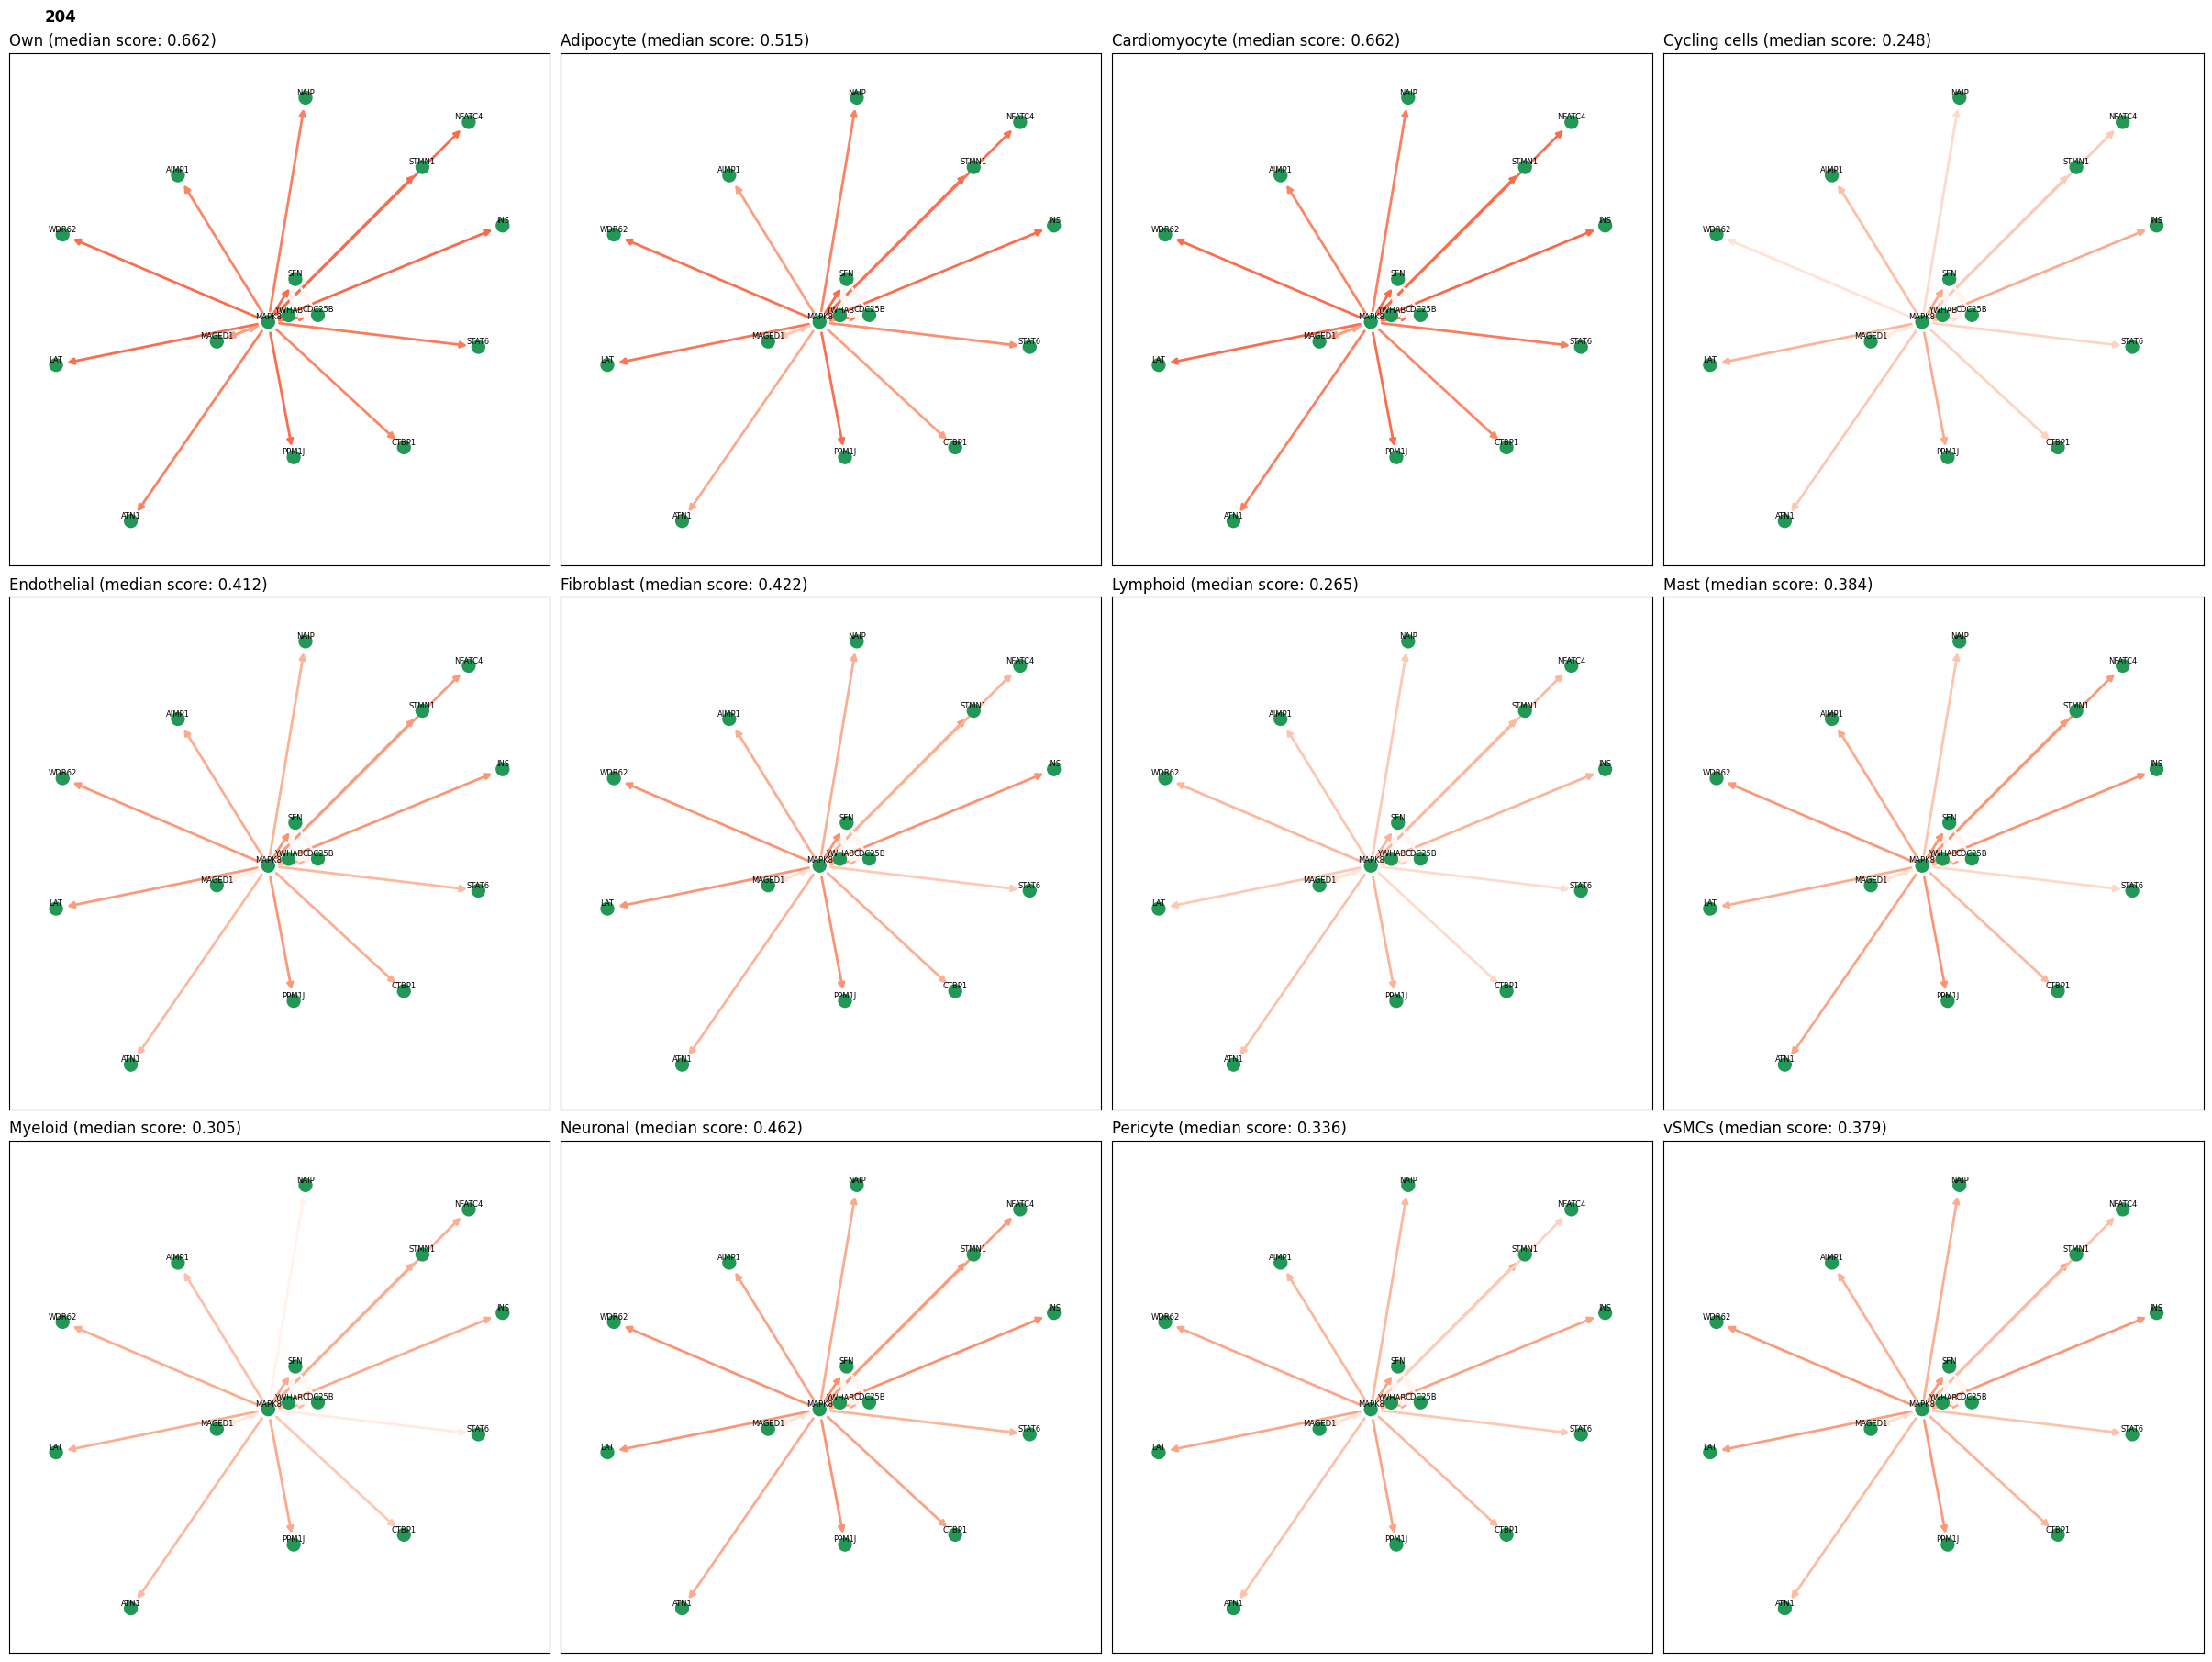

234


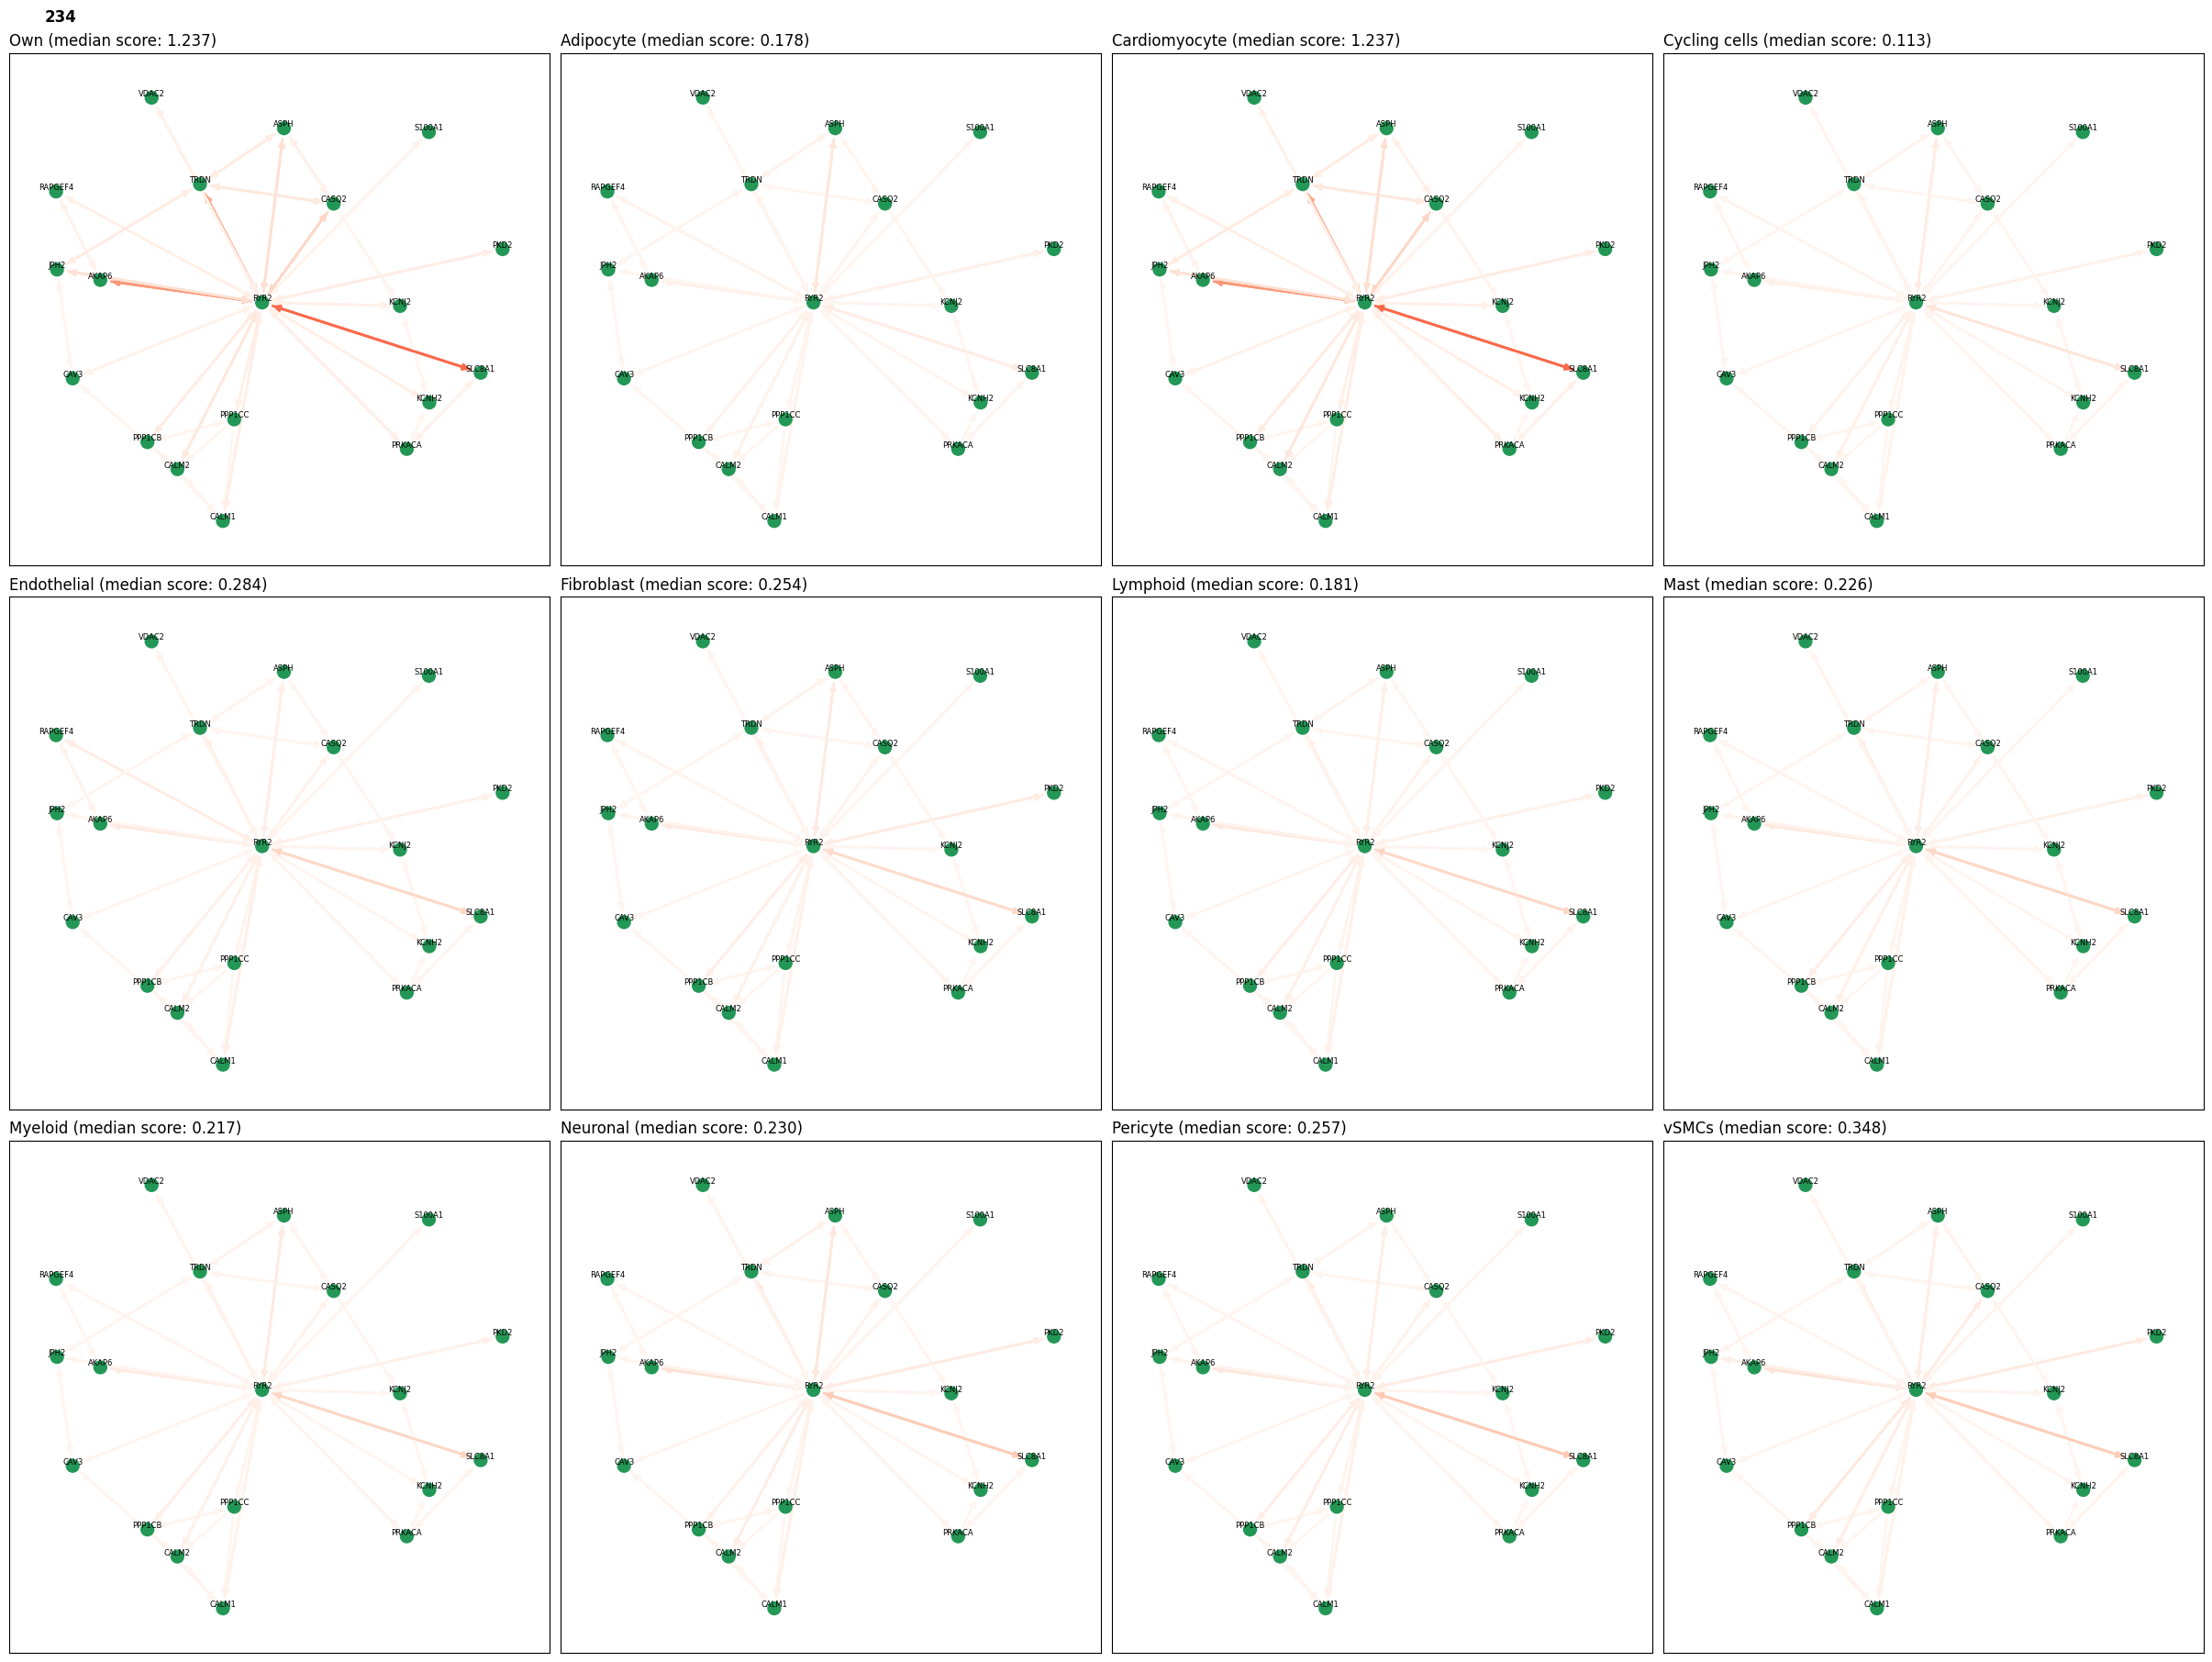

304


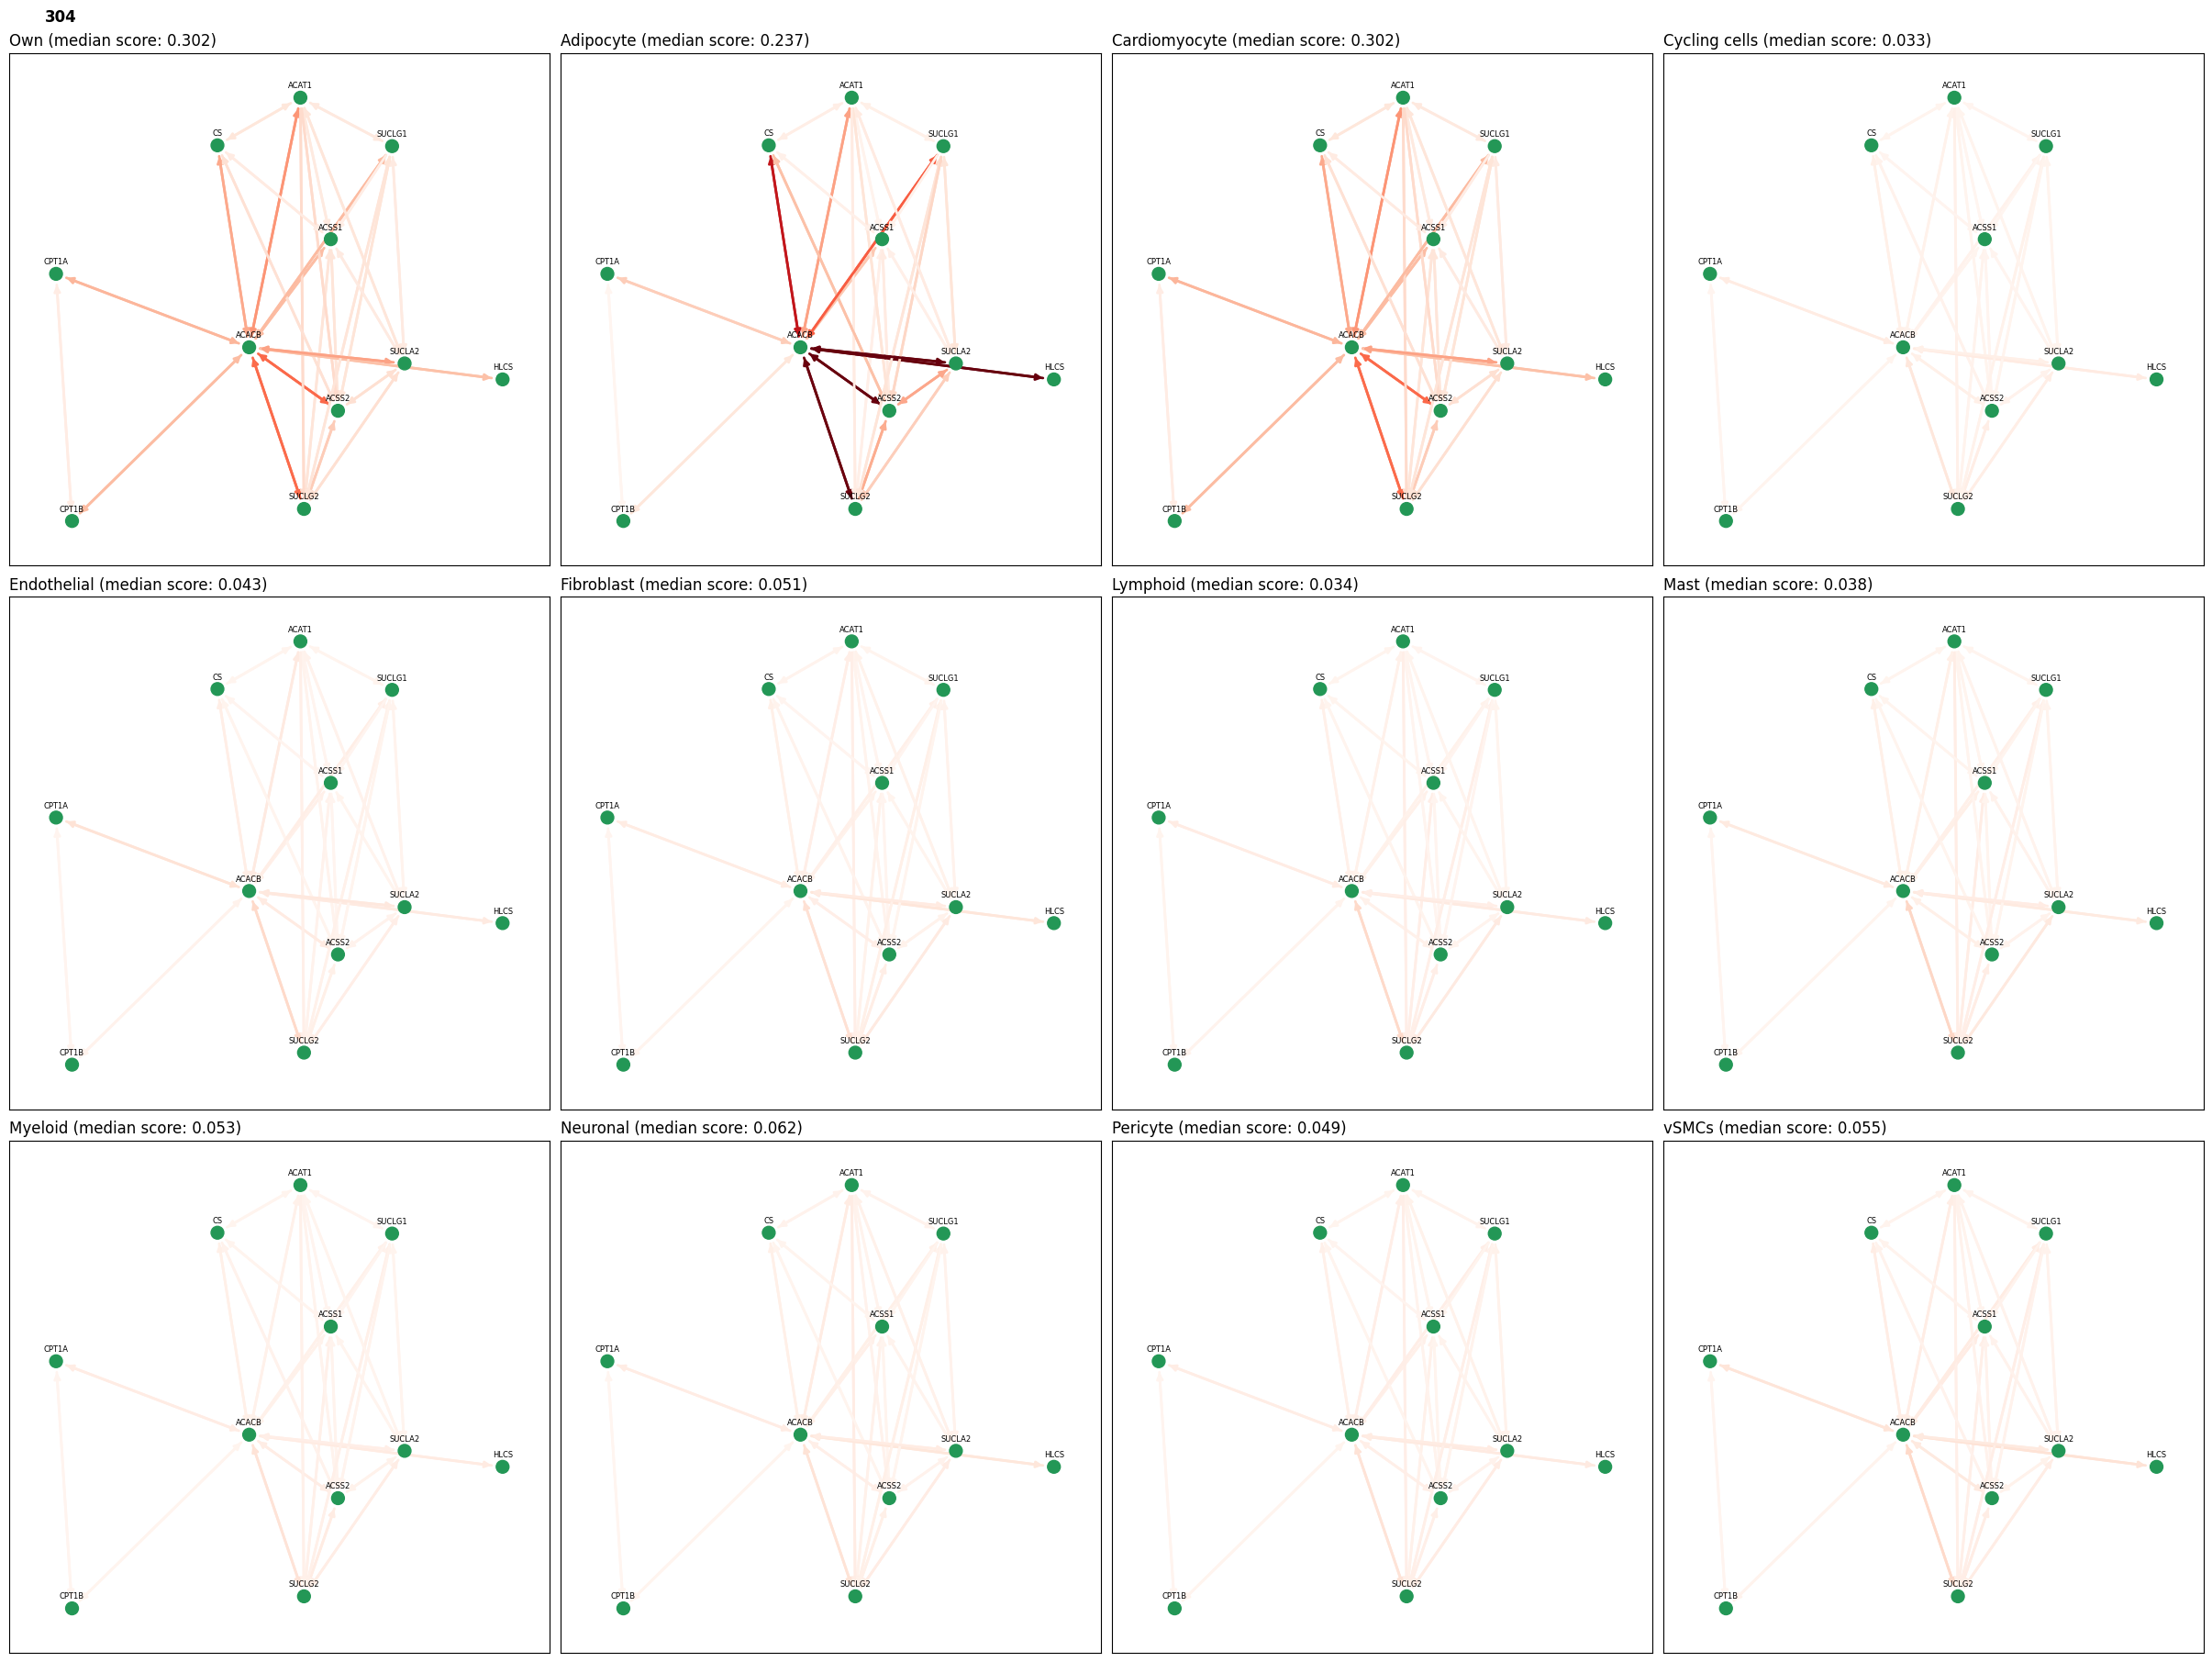

429


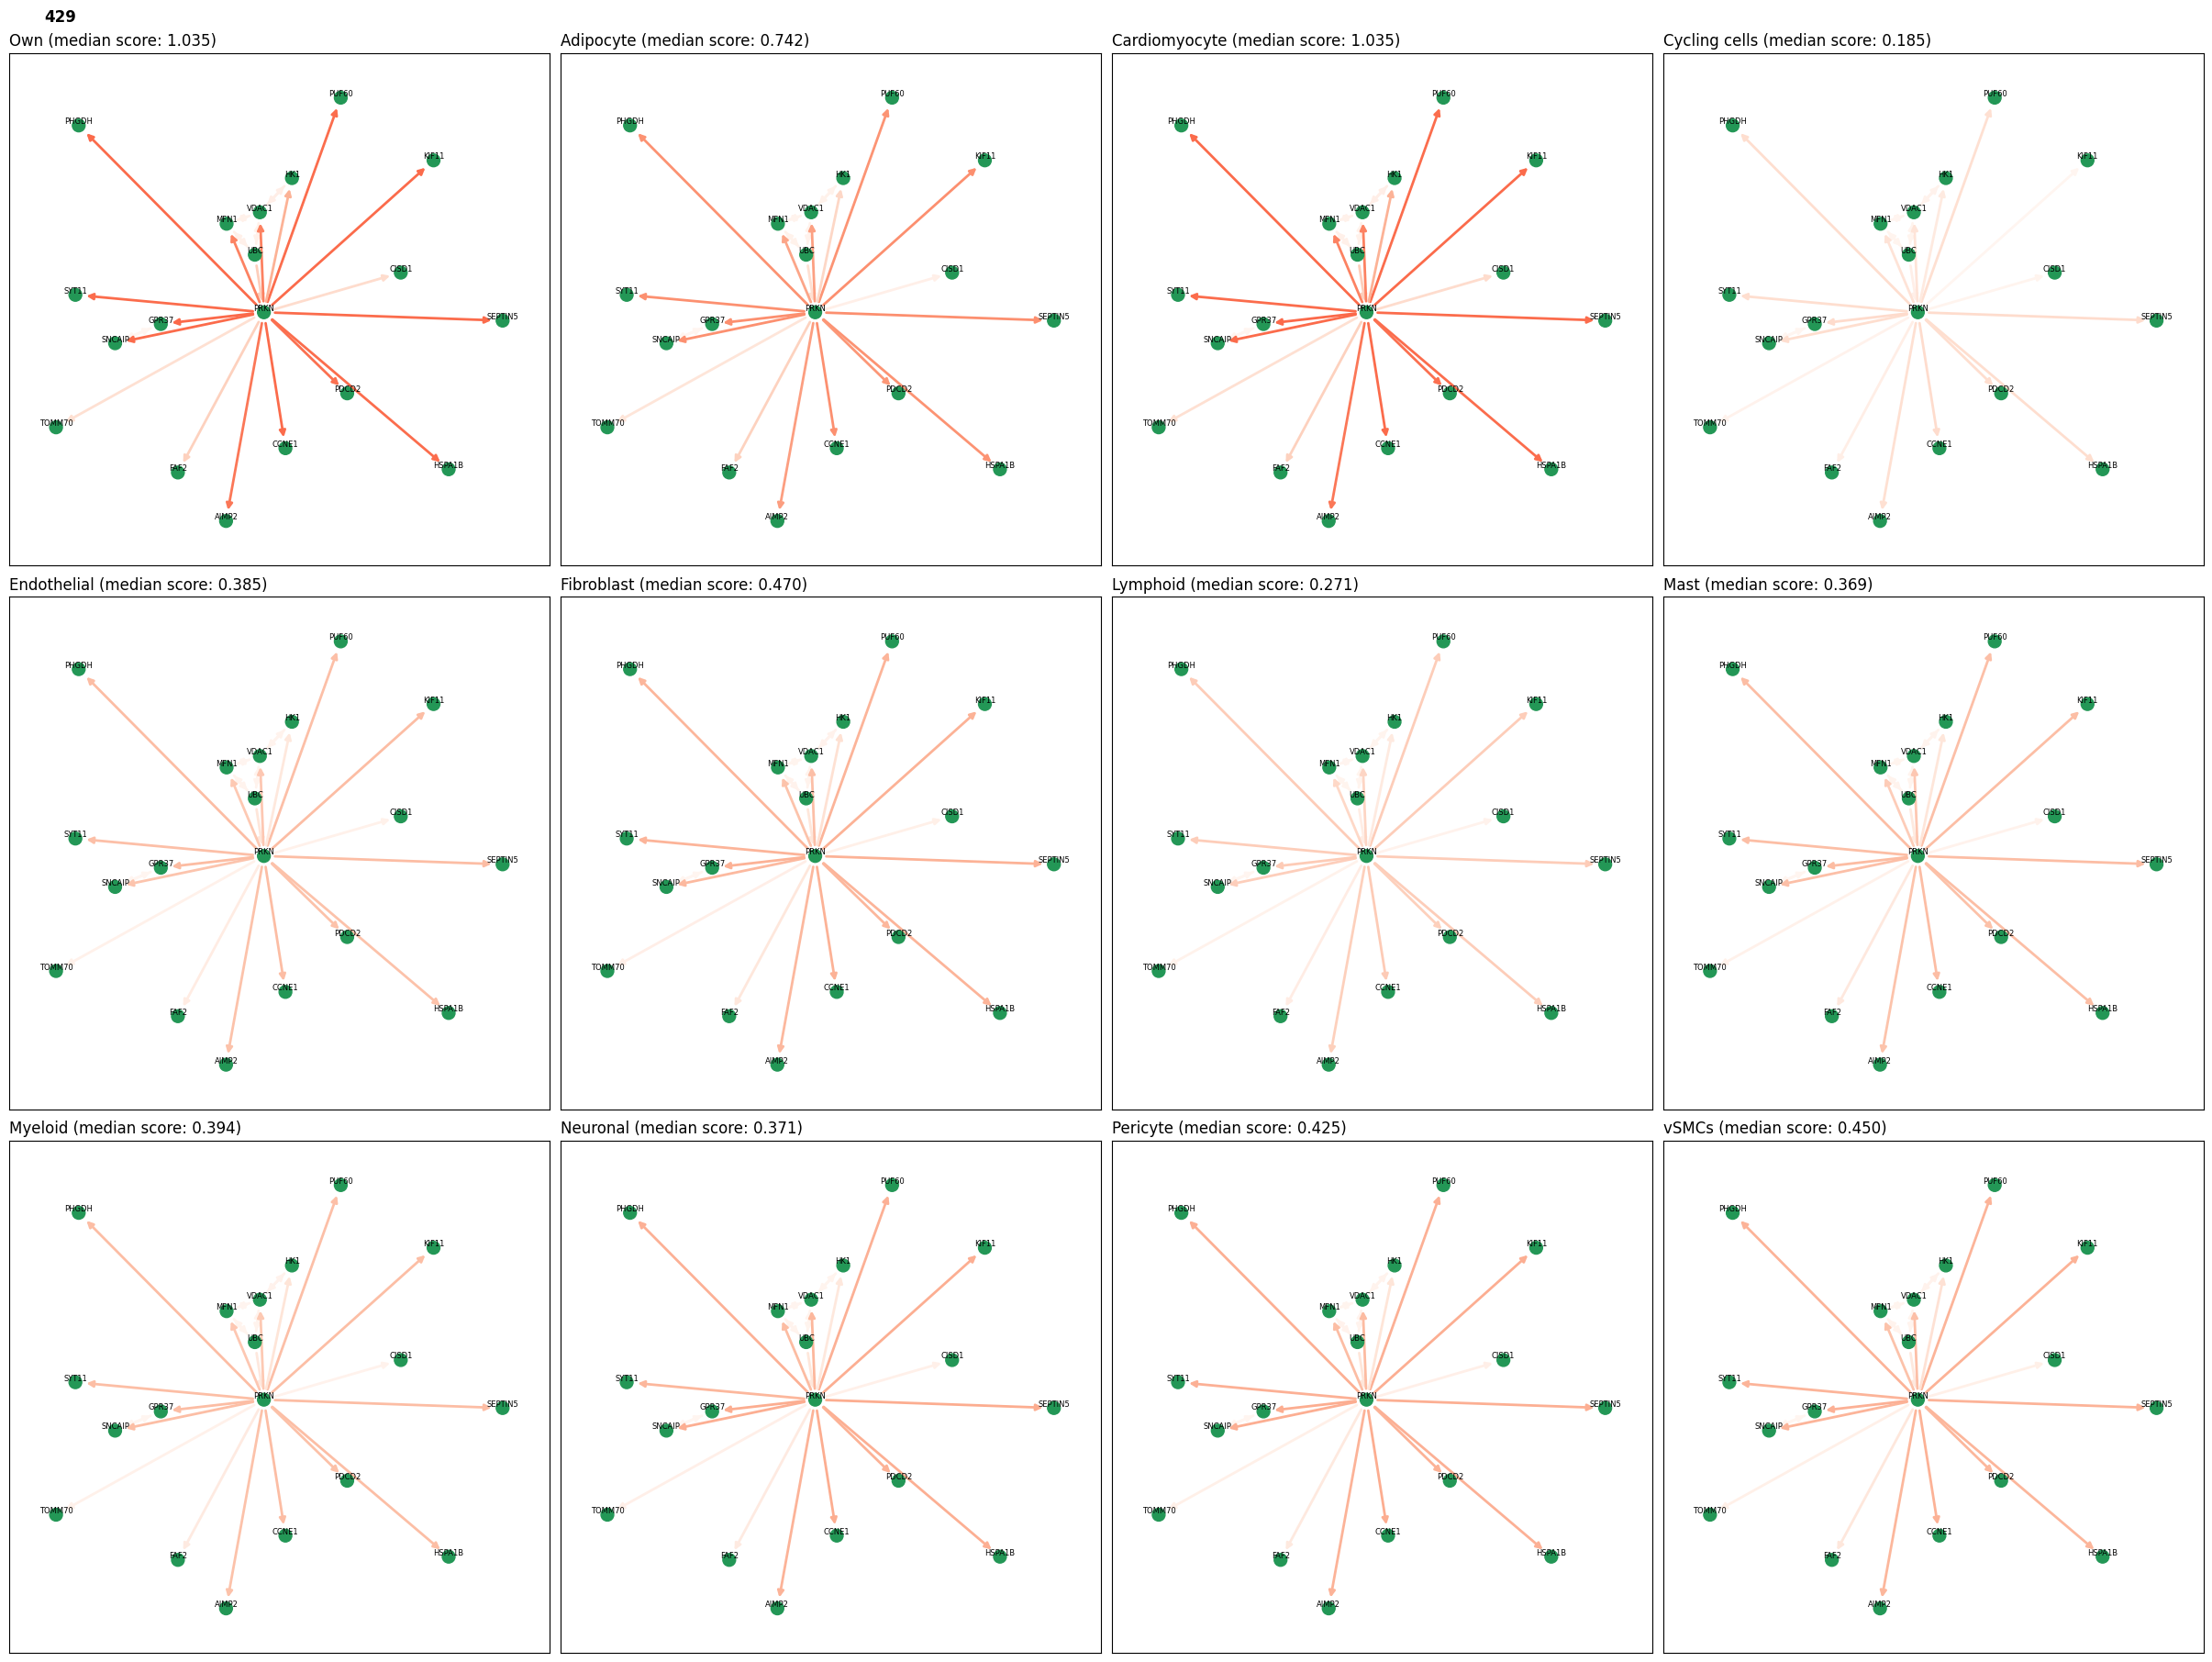

439


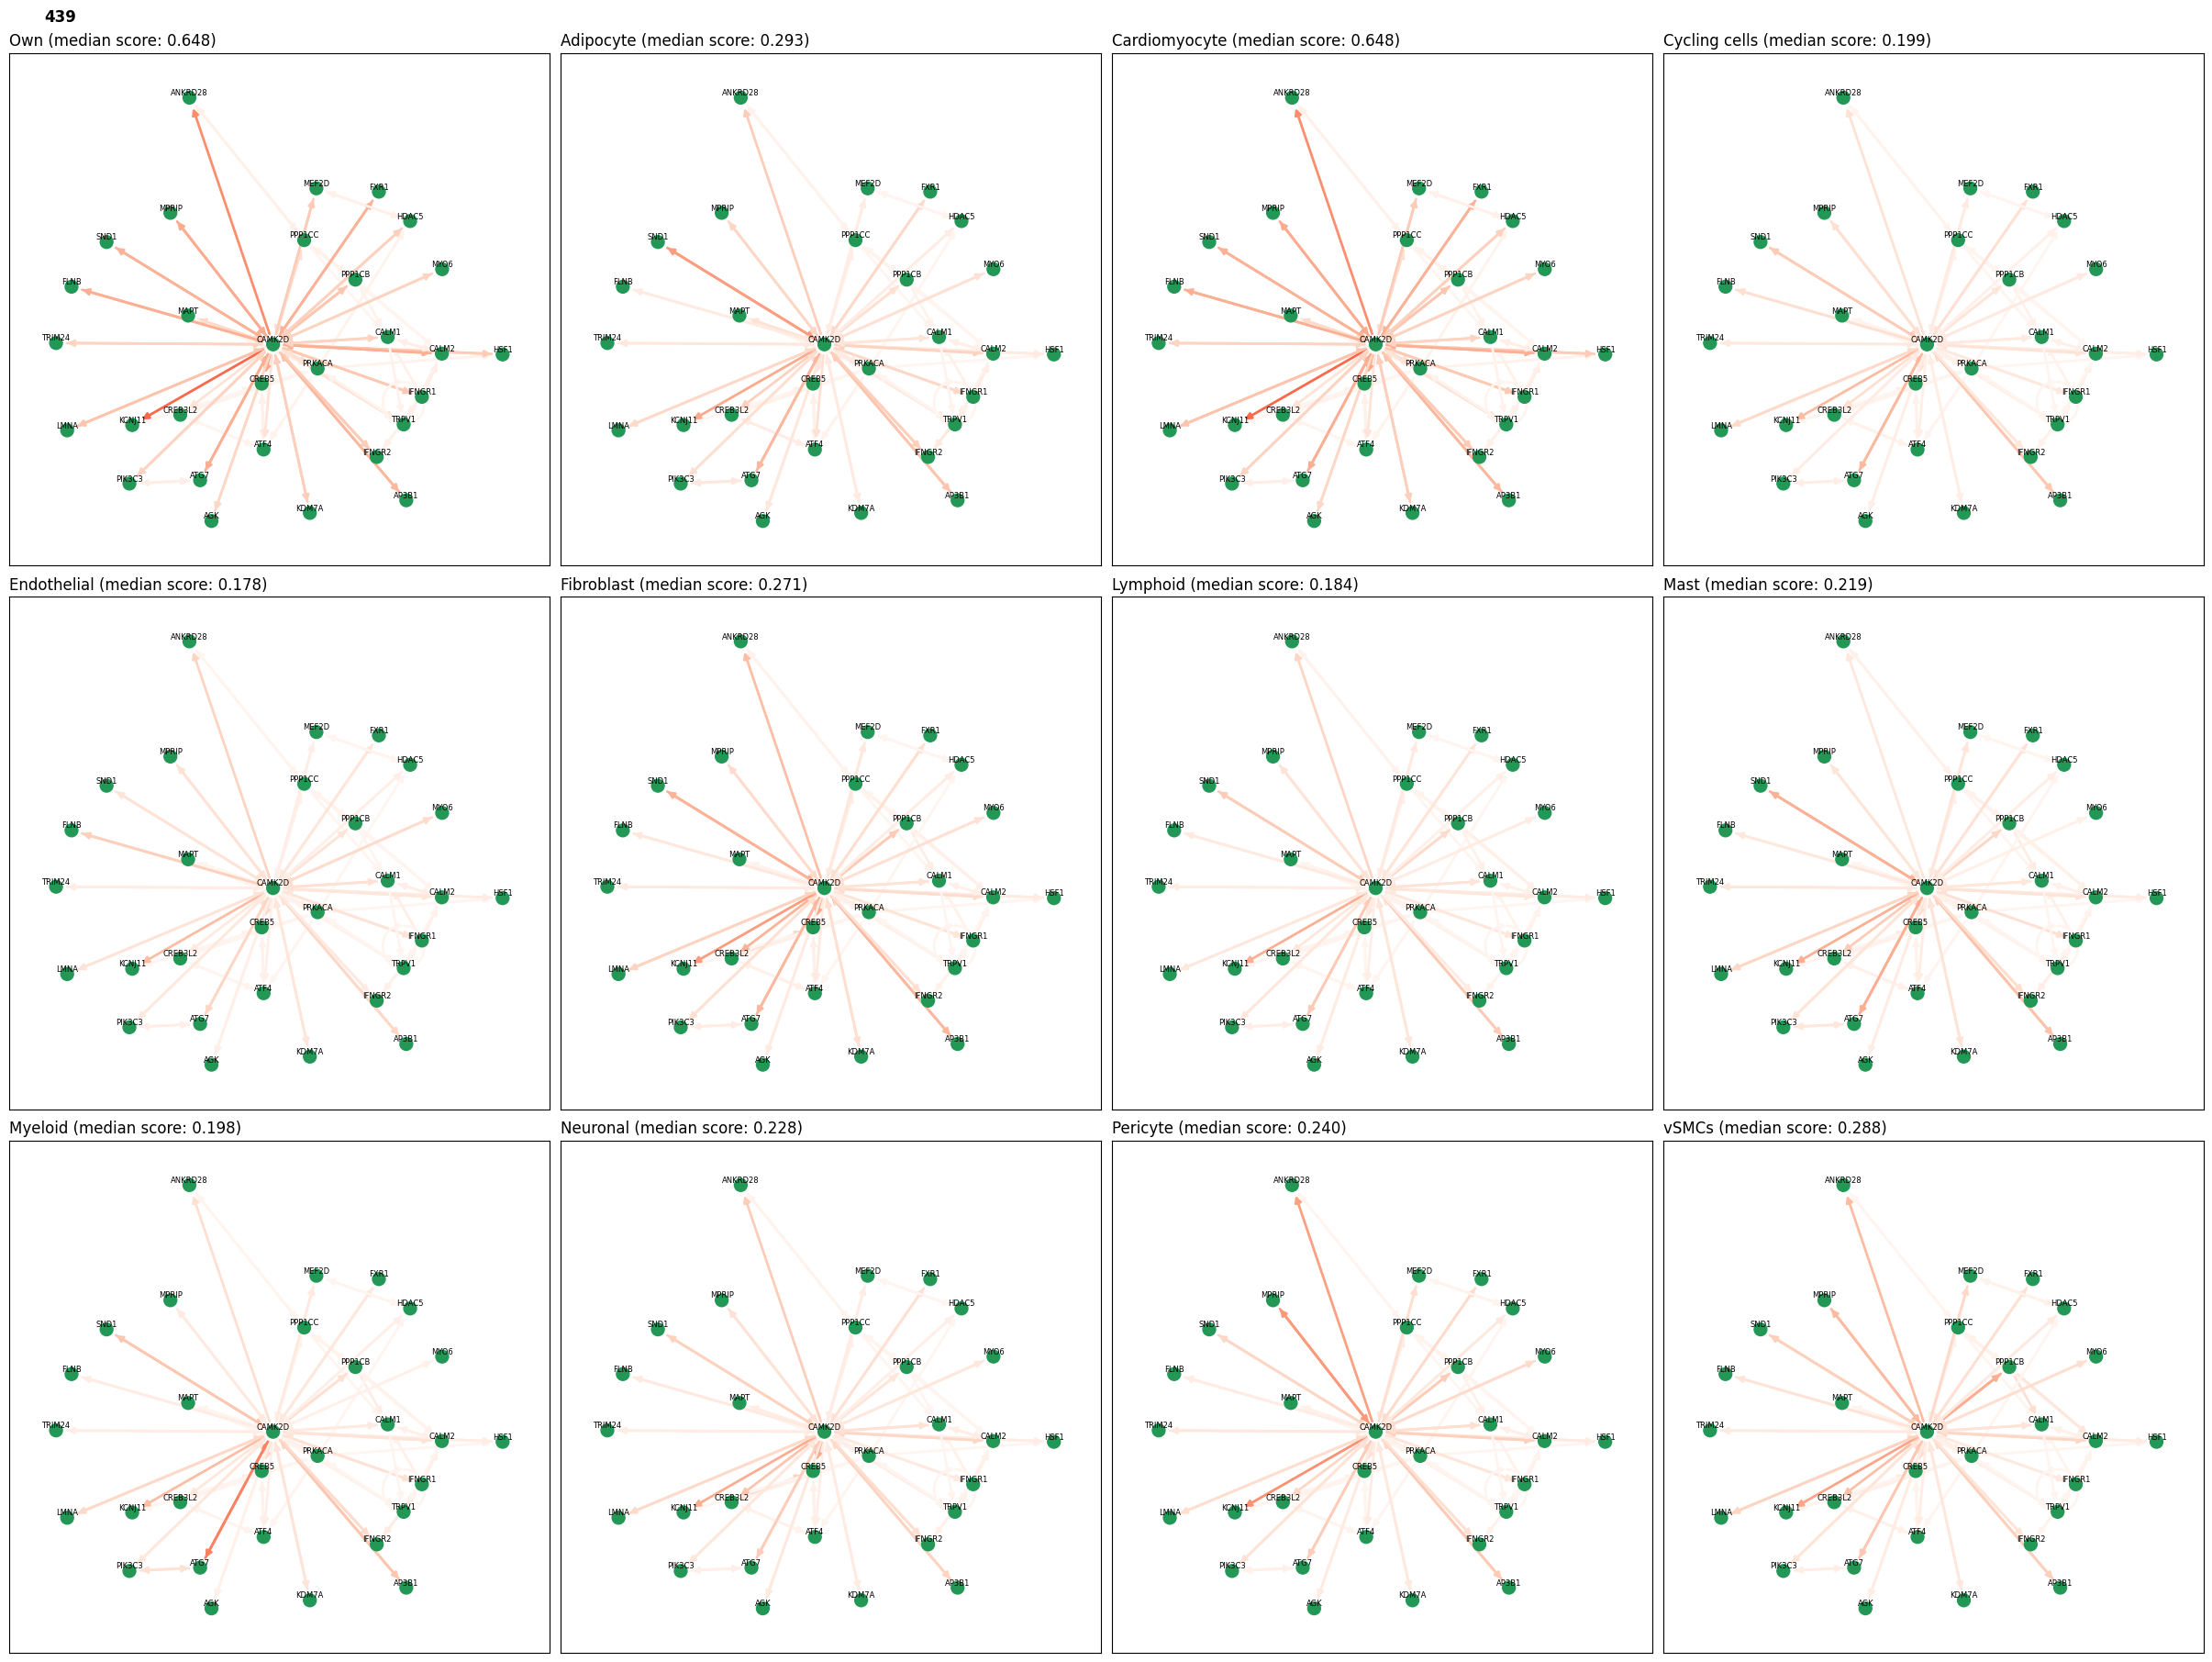

446


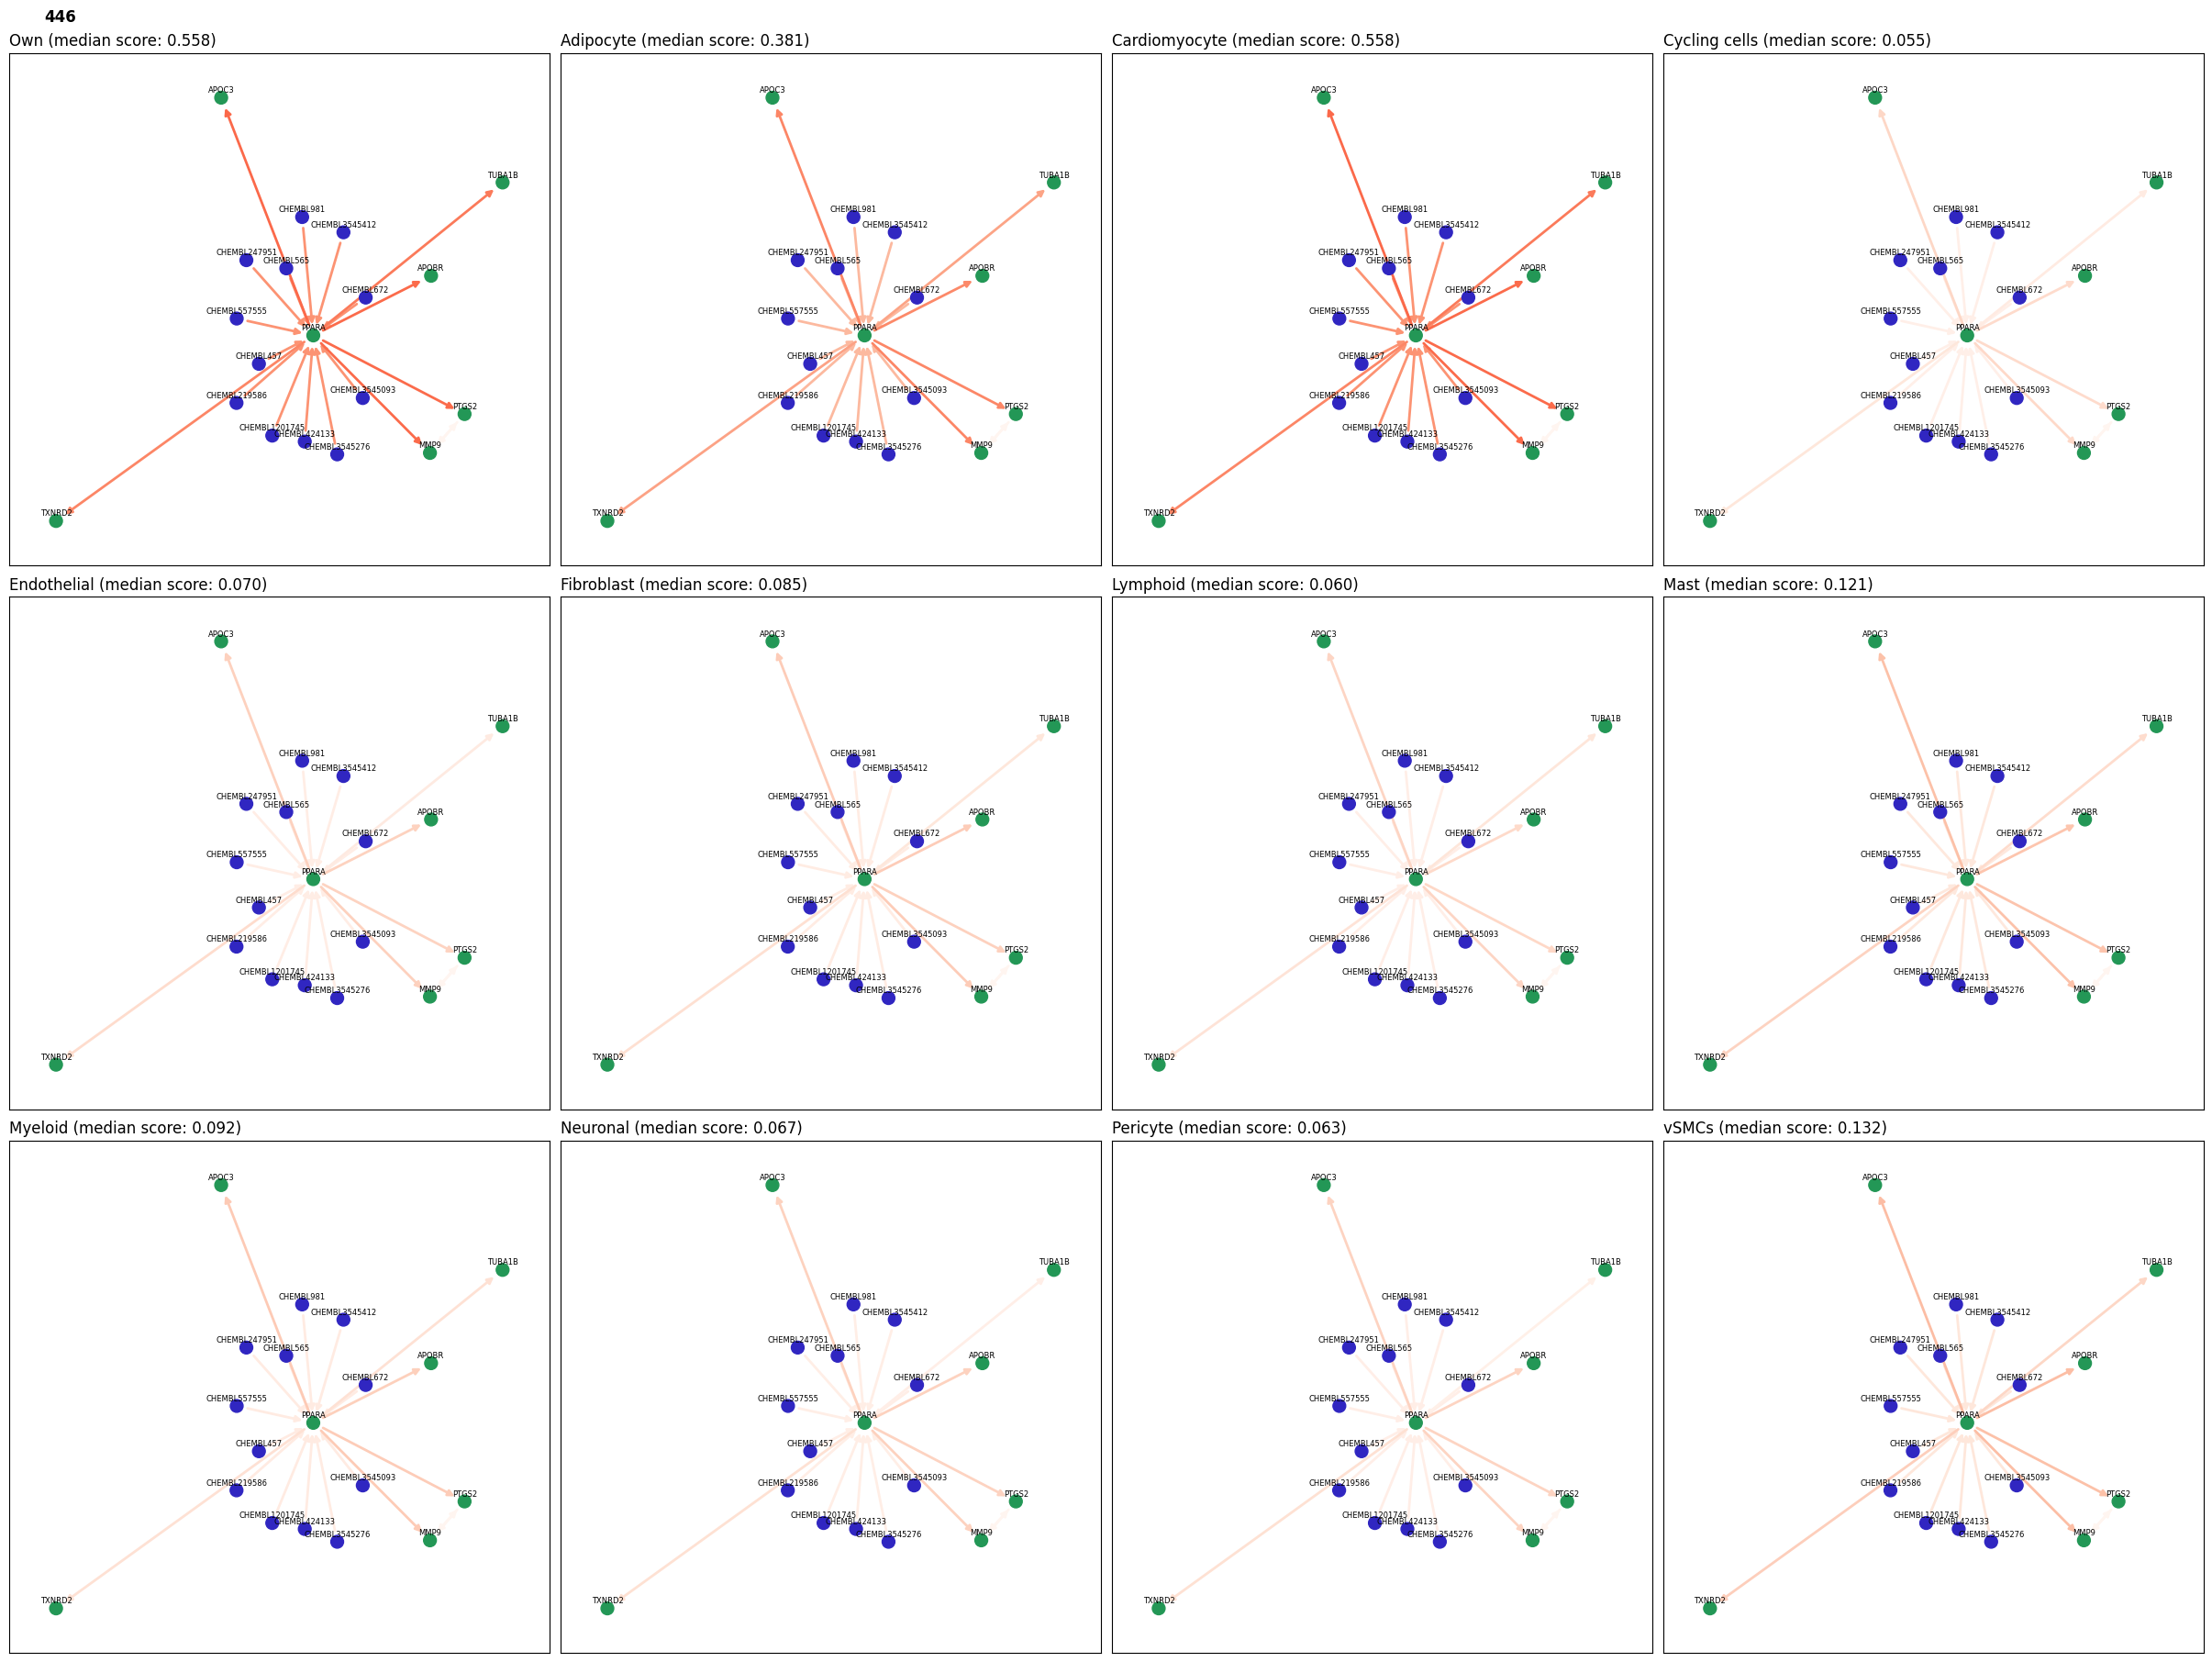

453


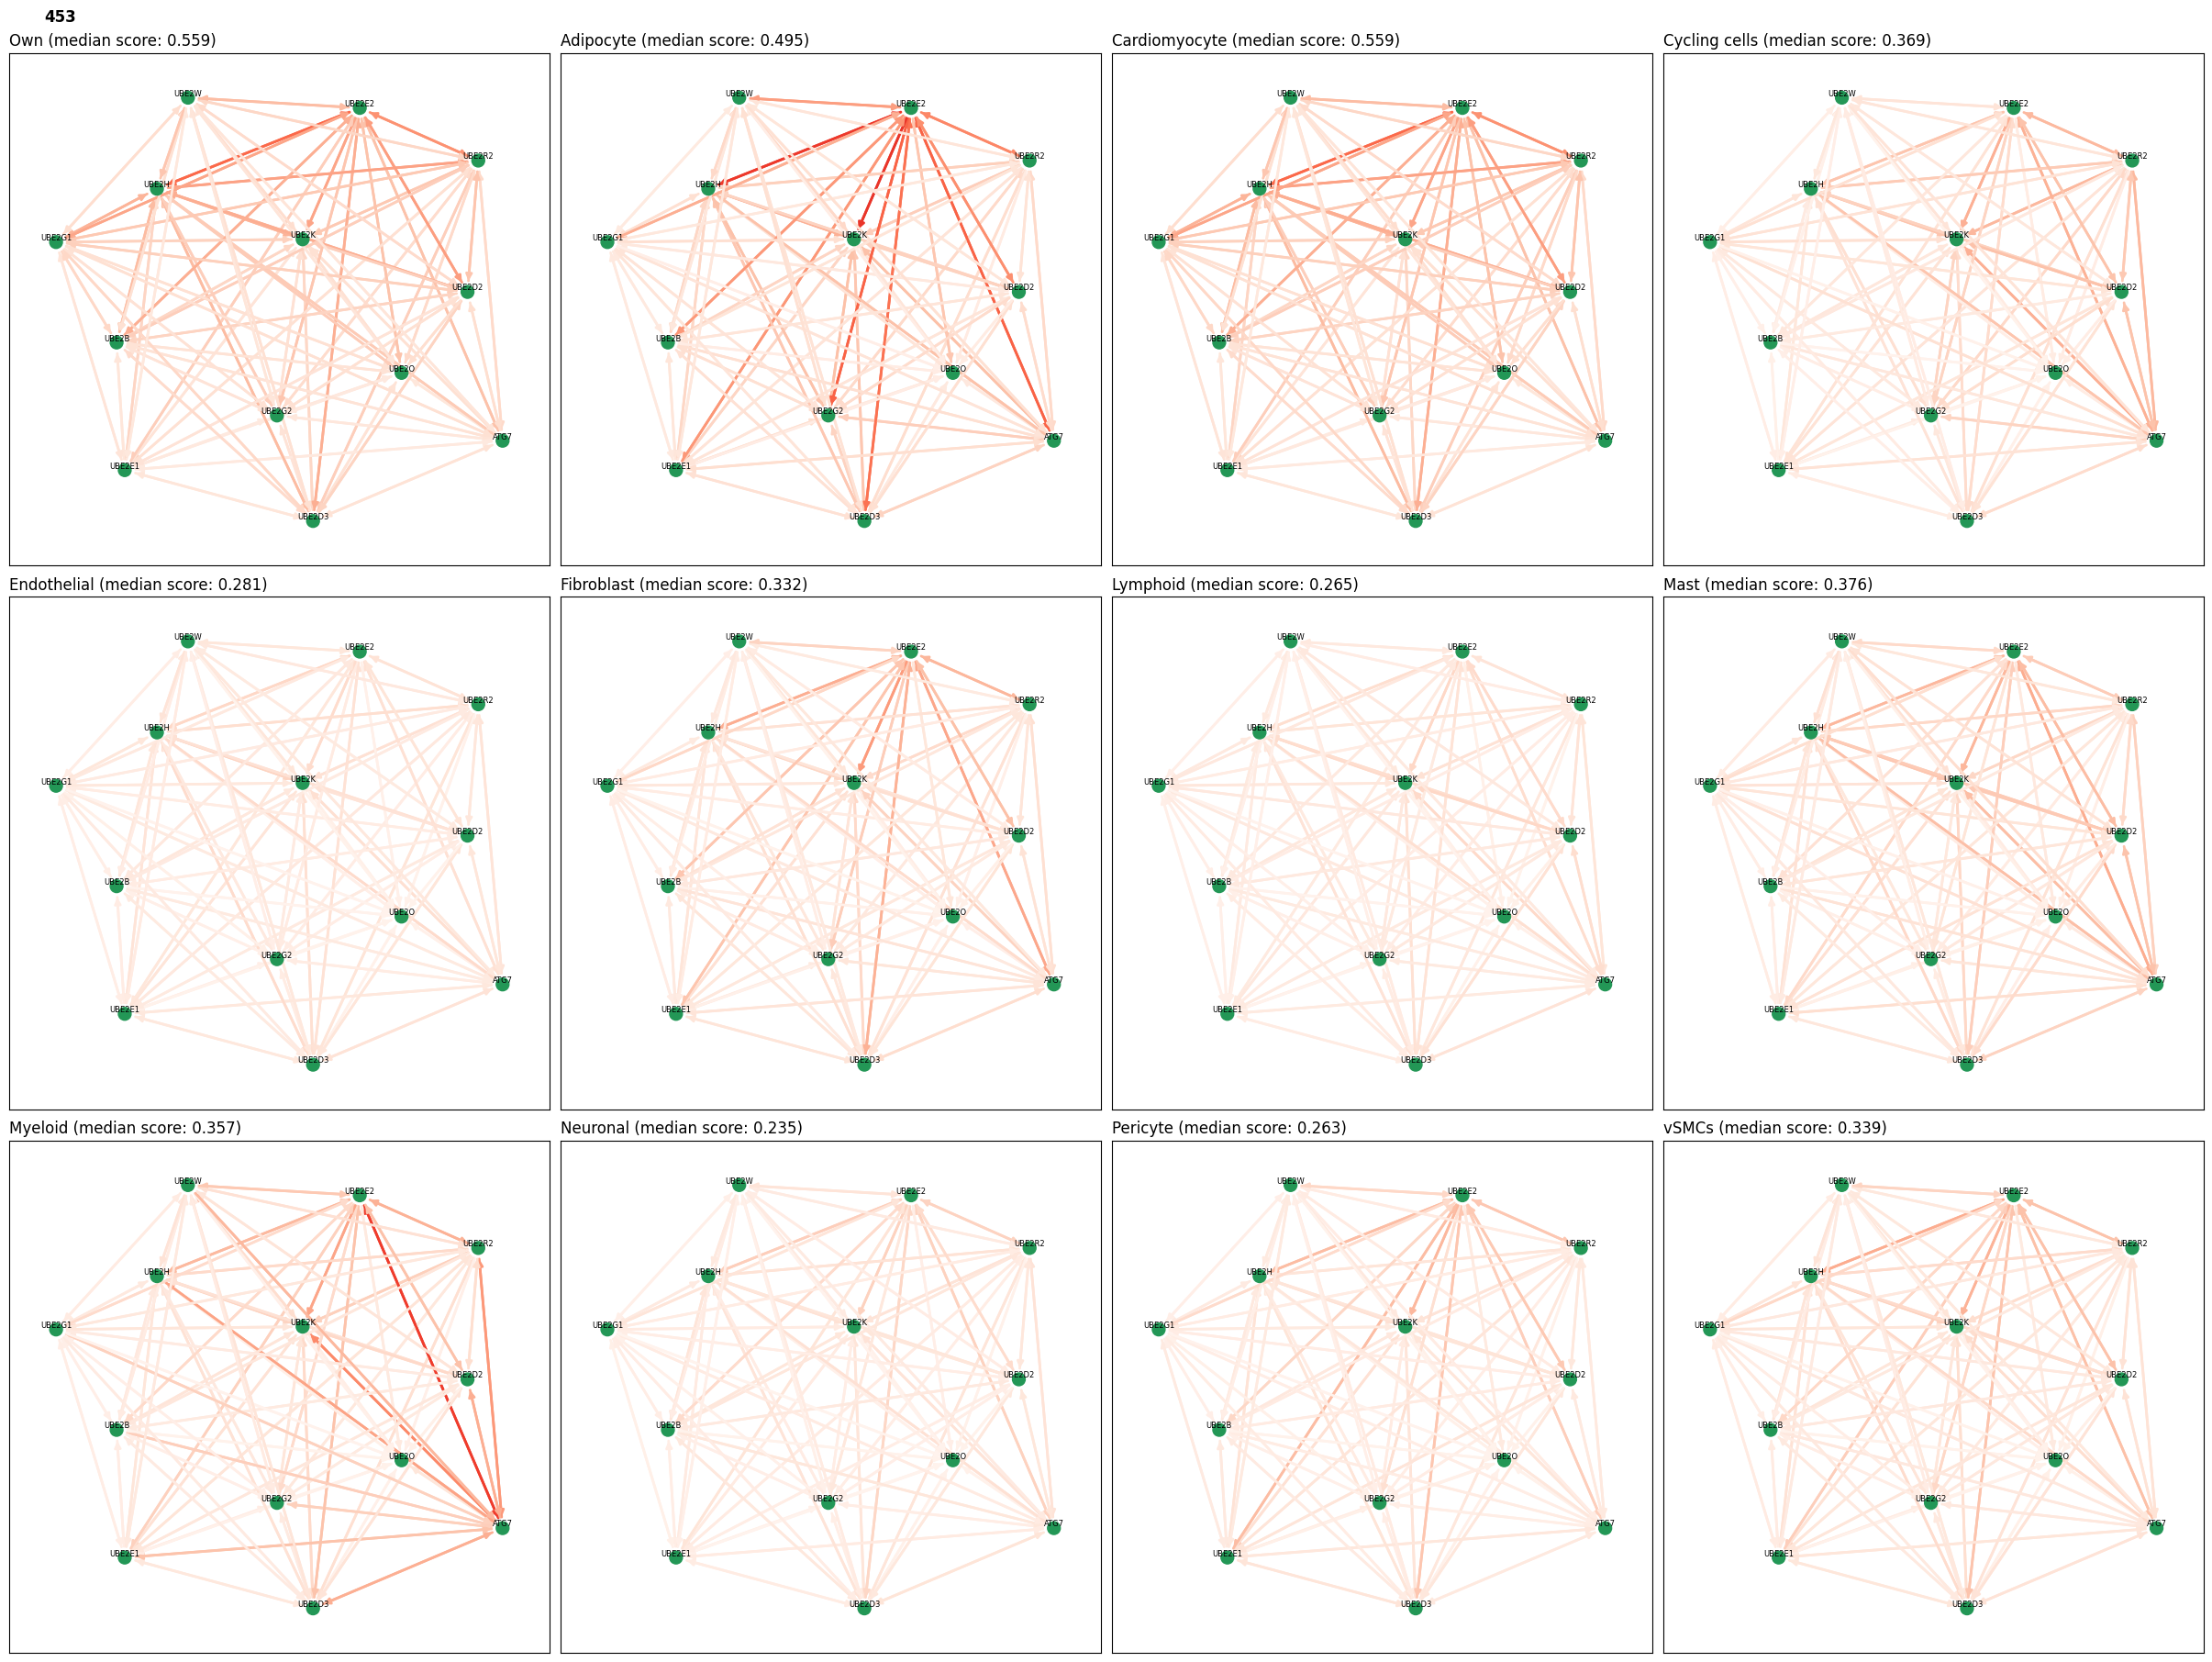

462


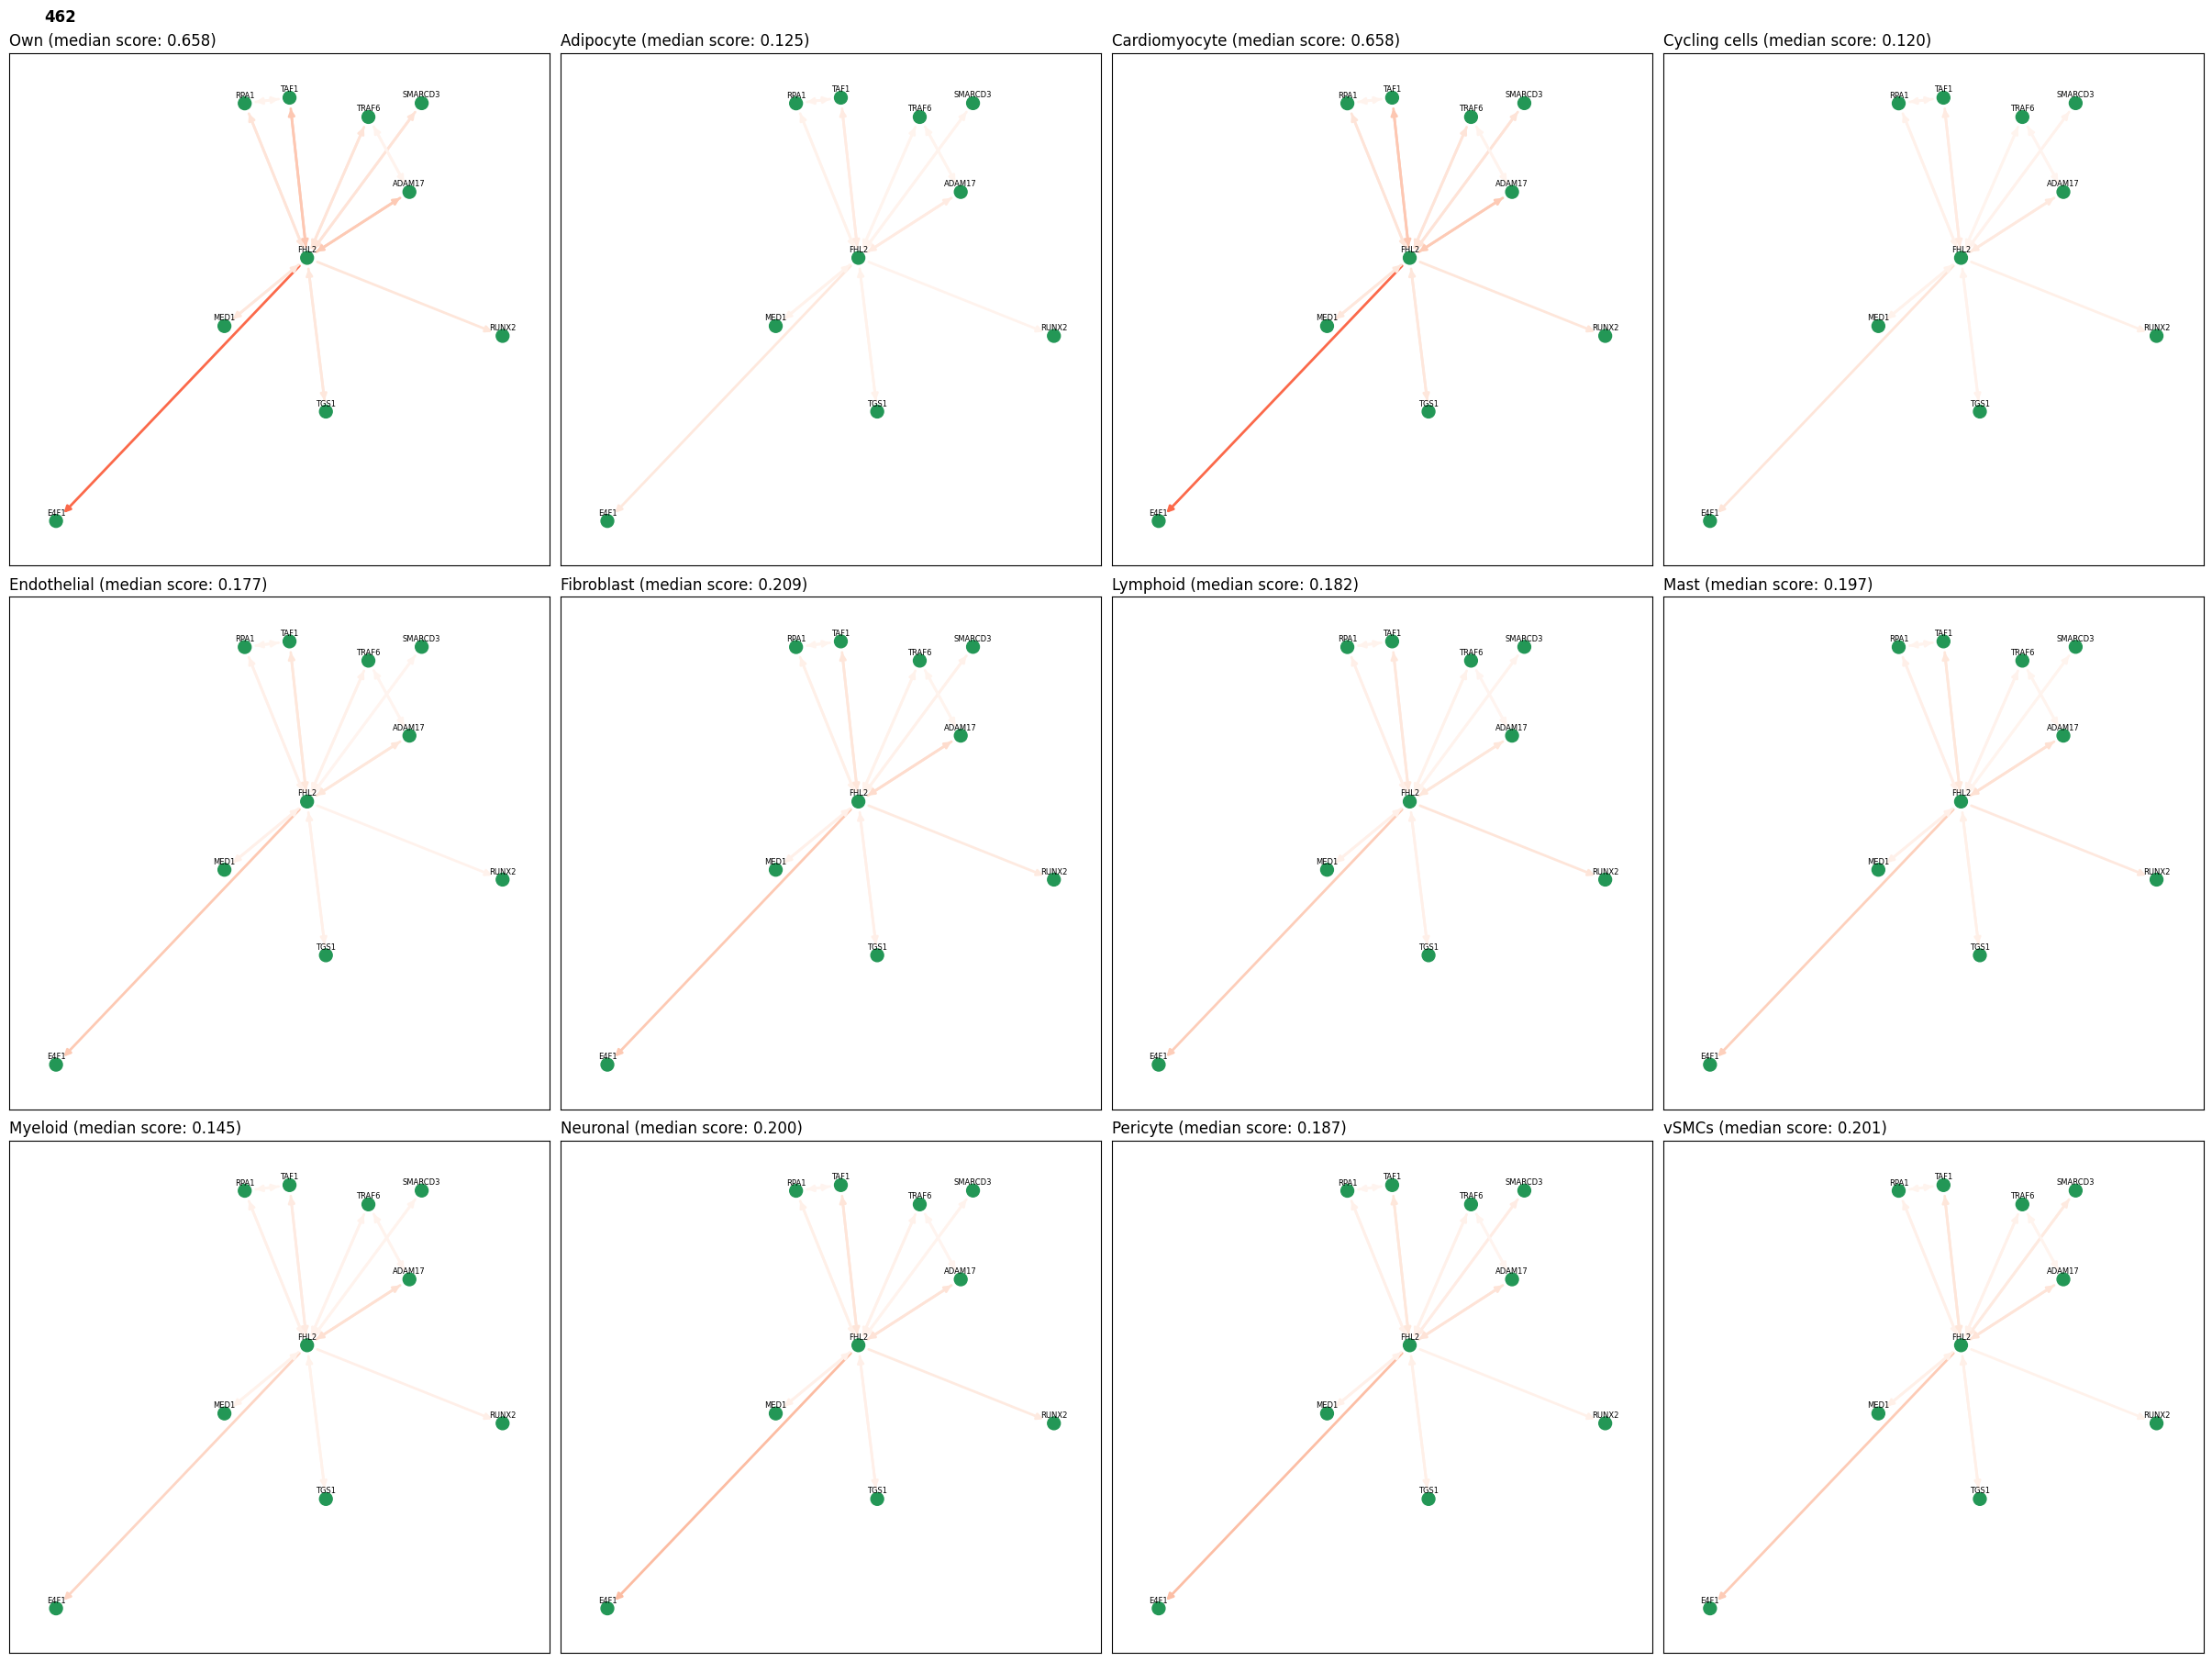

546


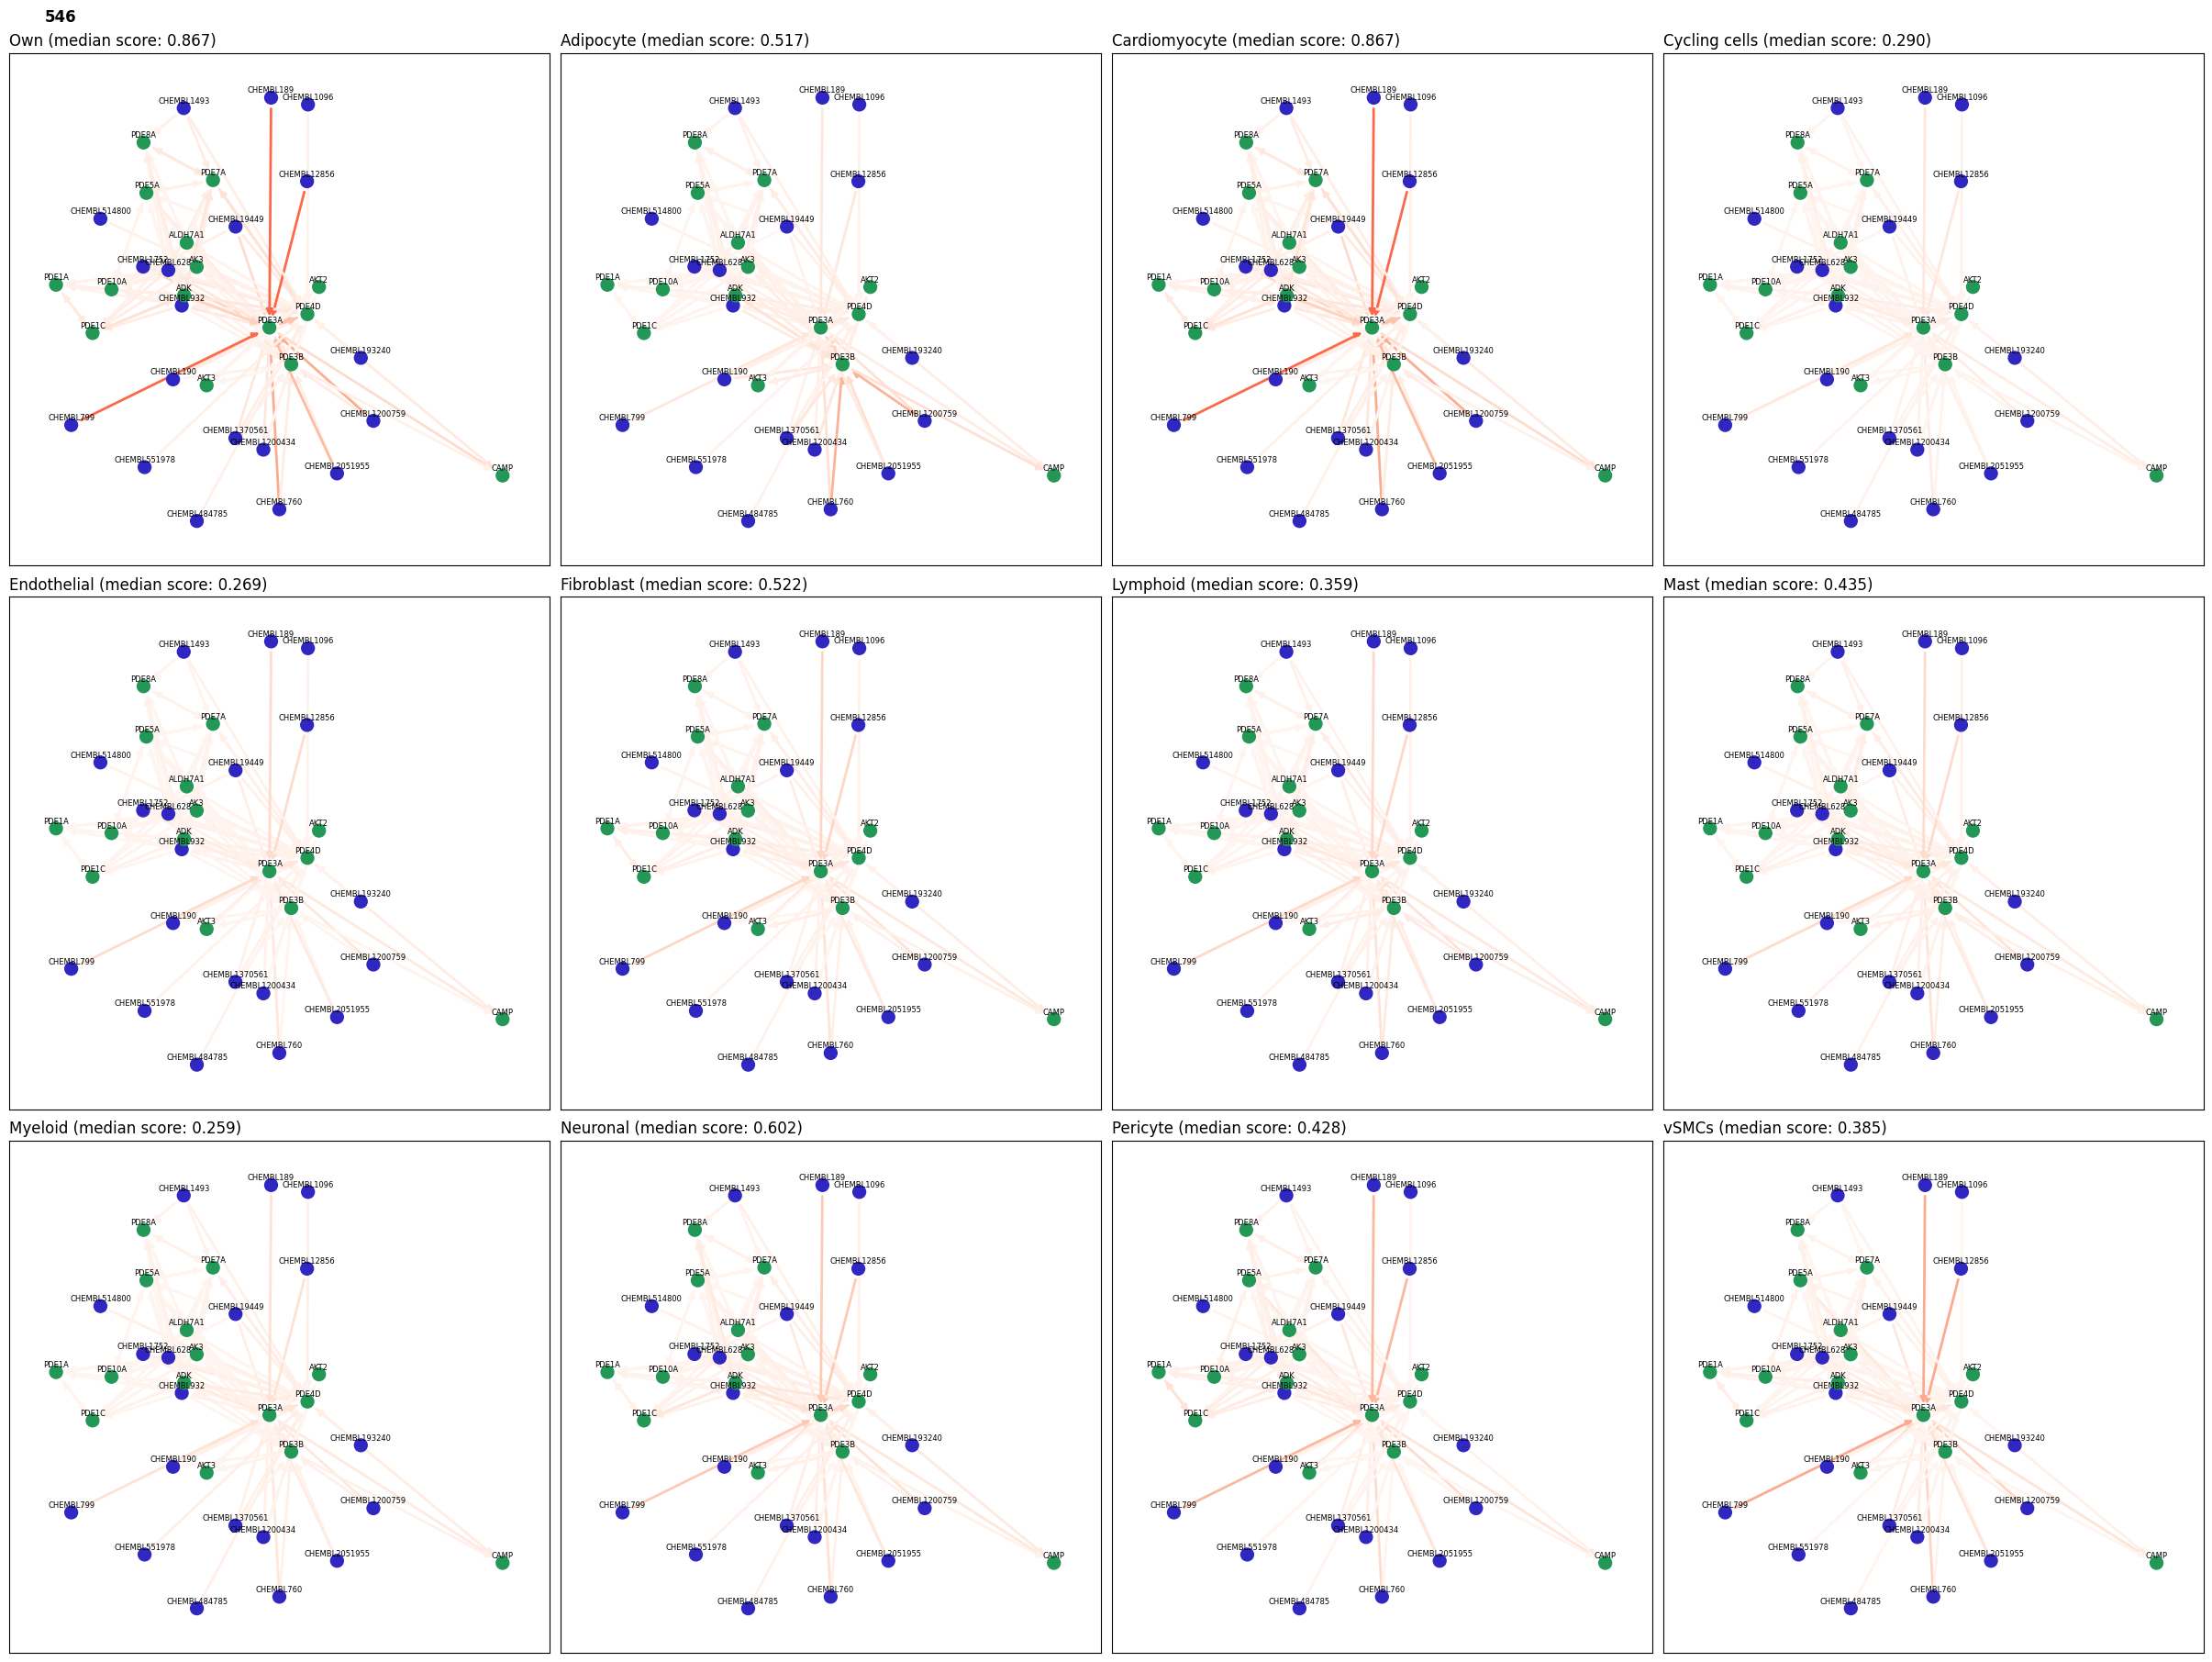

590


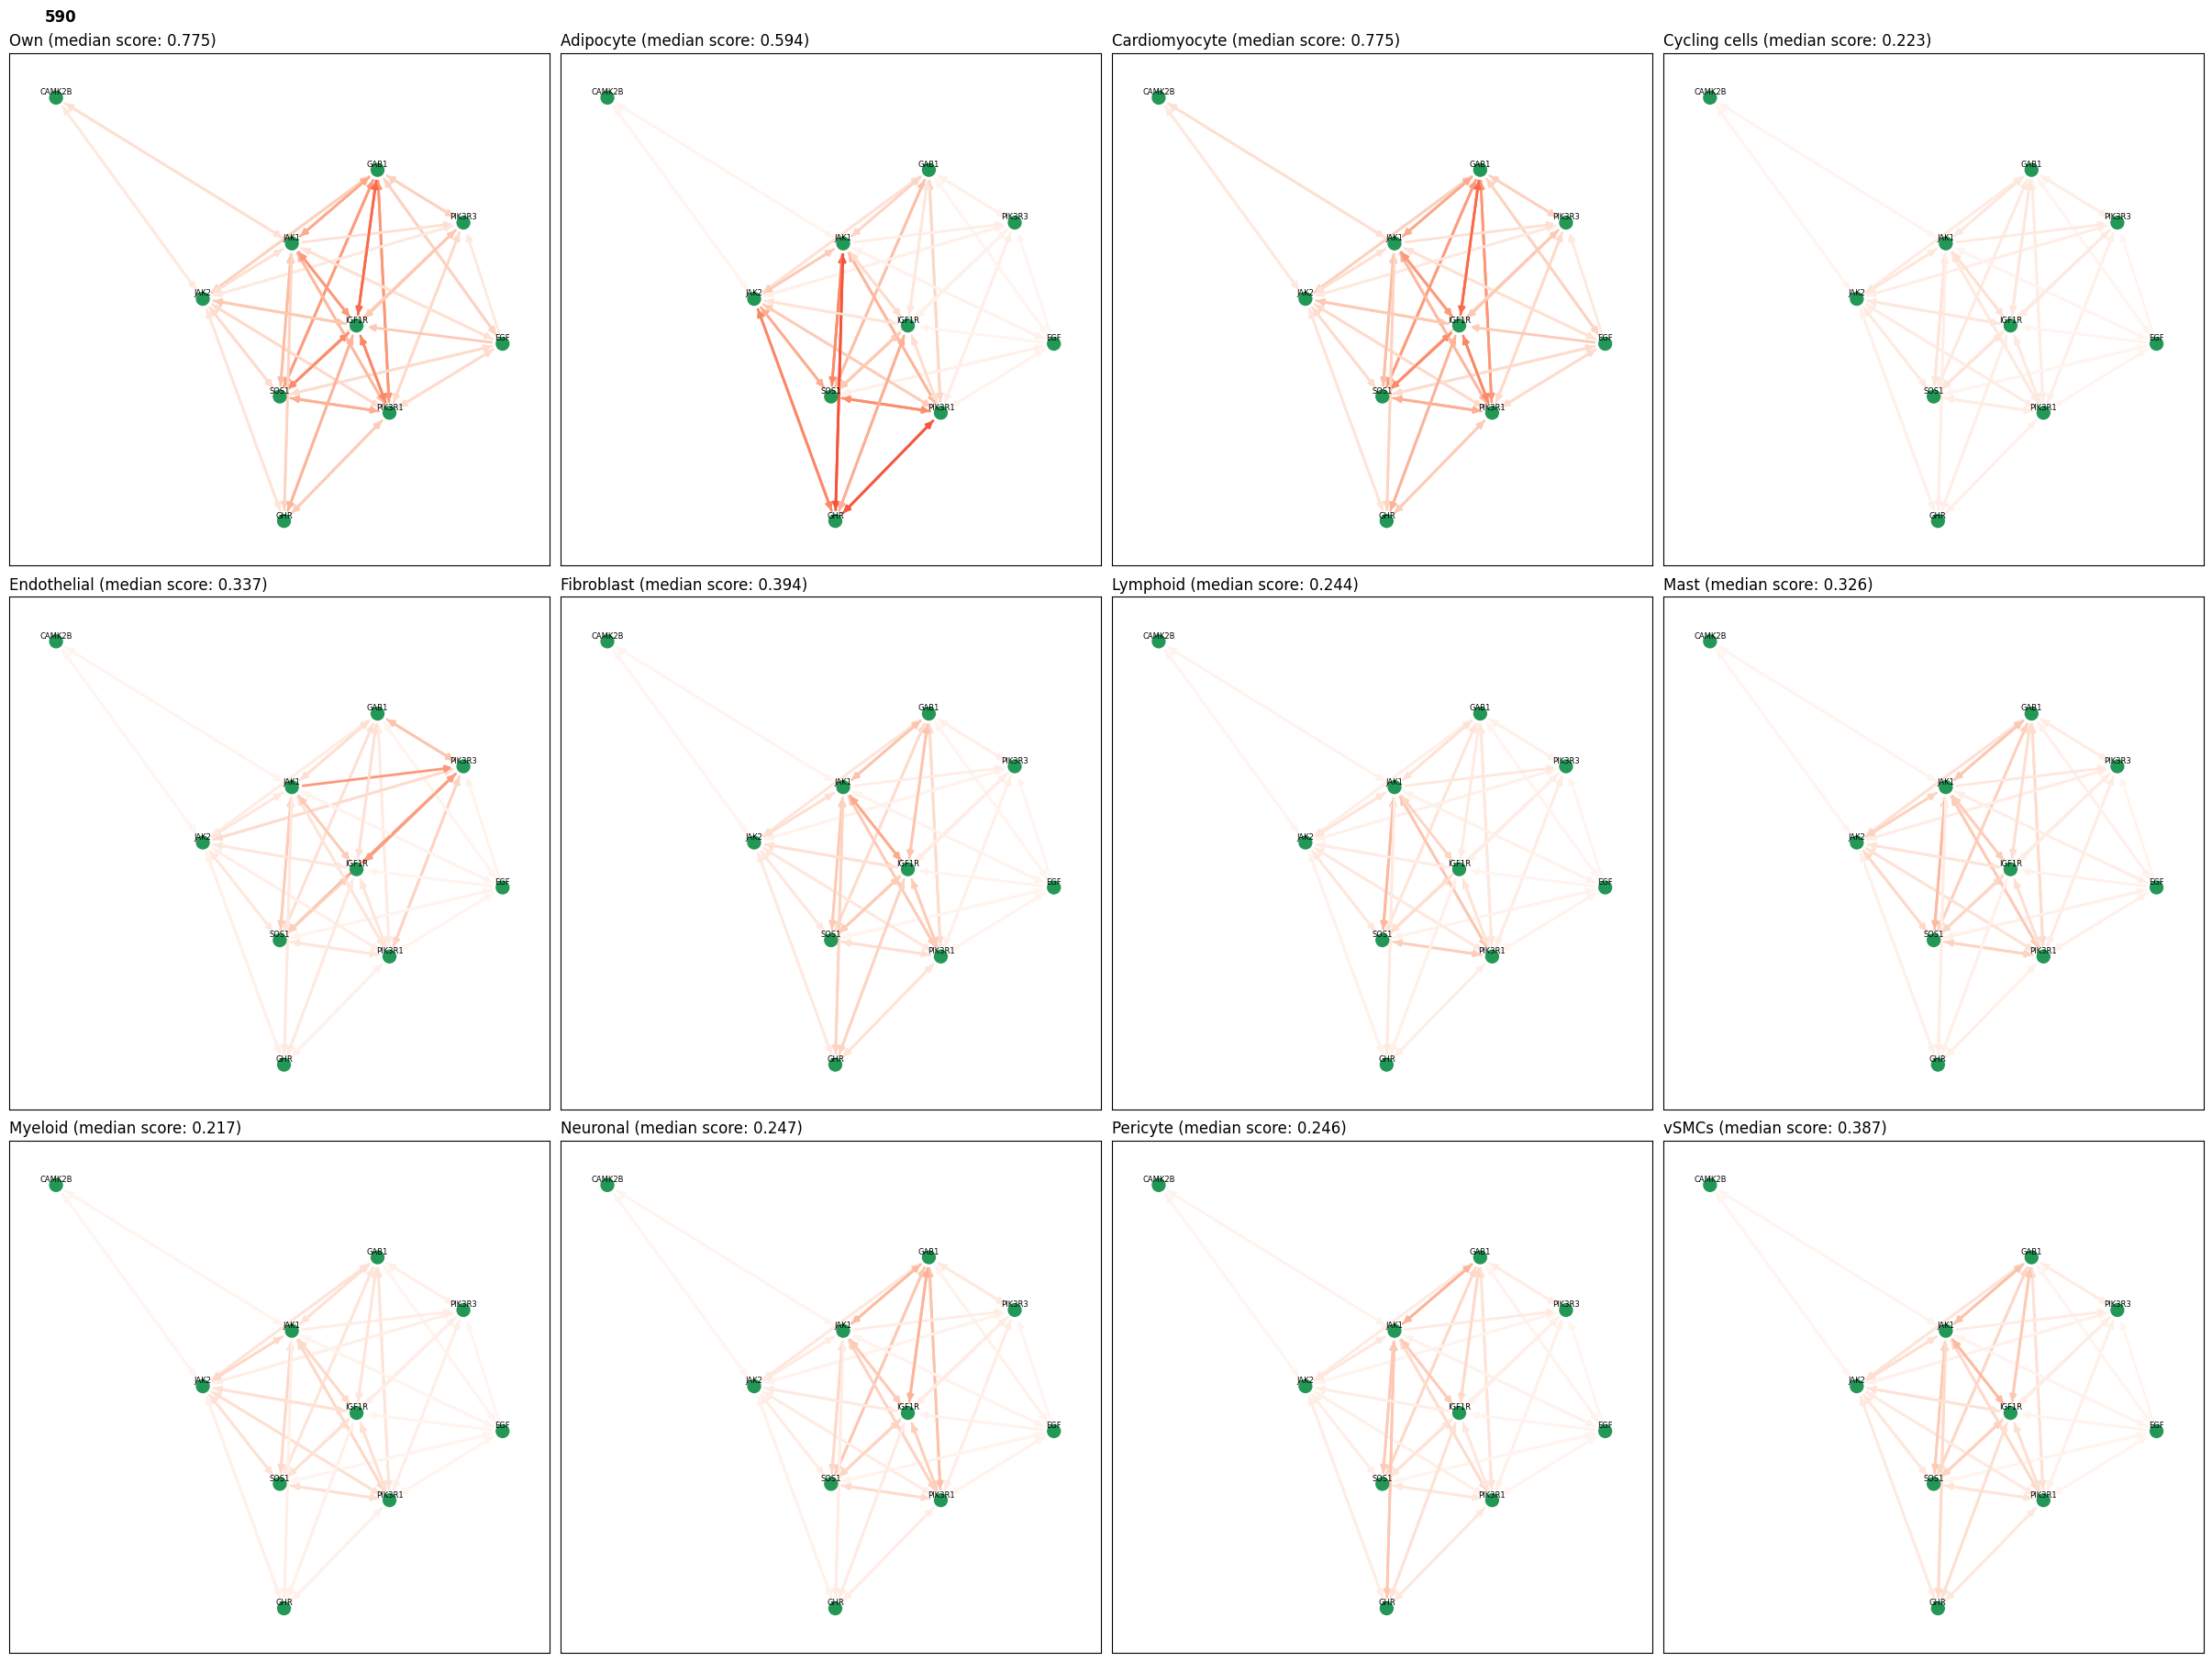

598


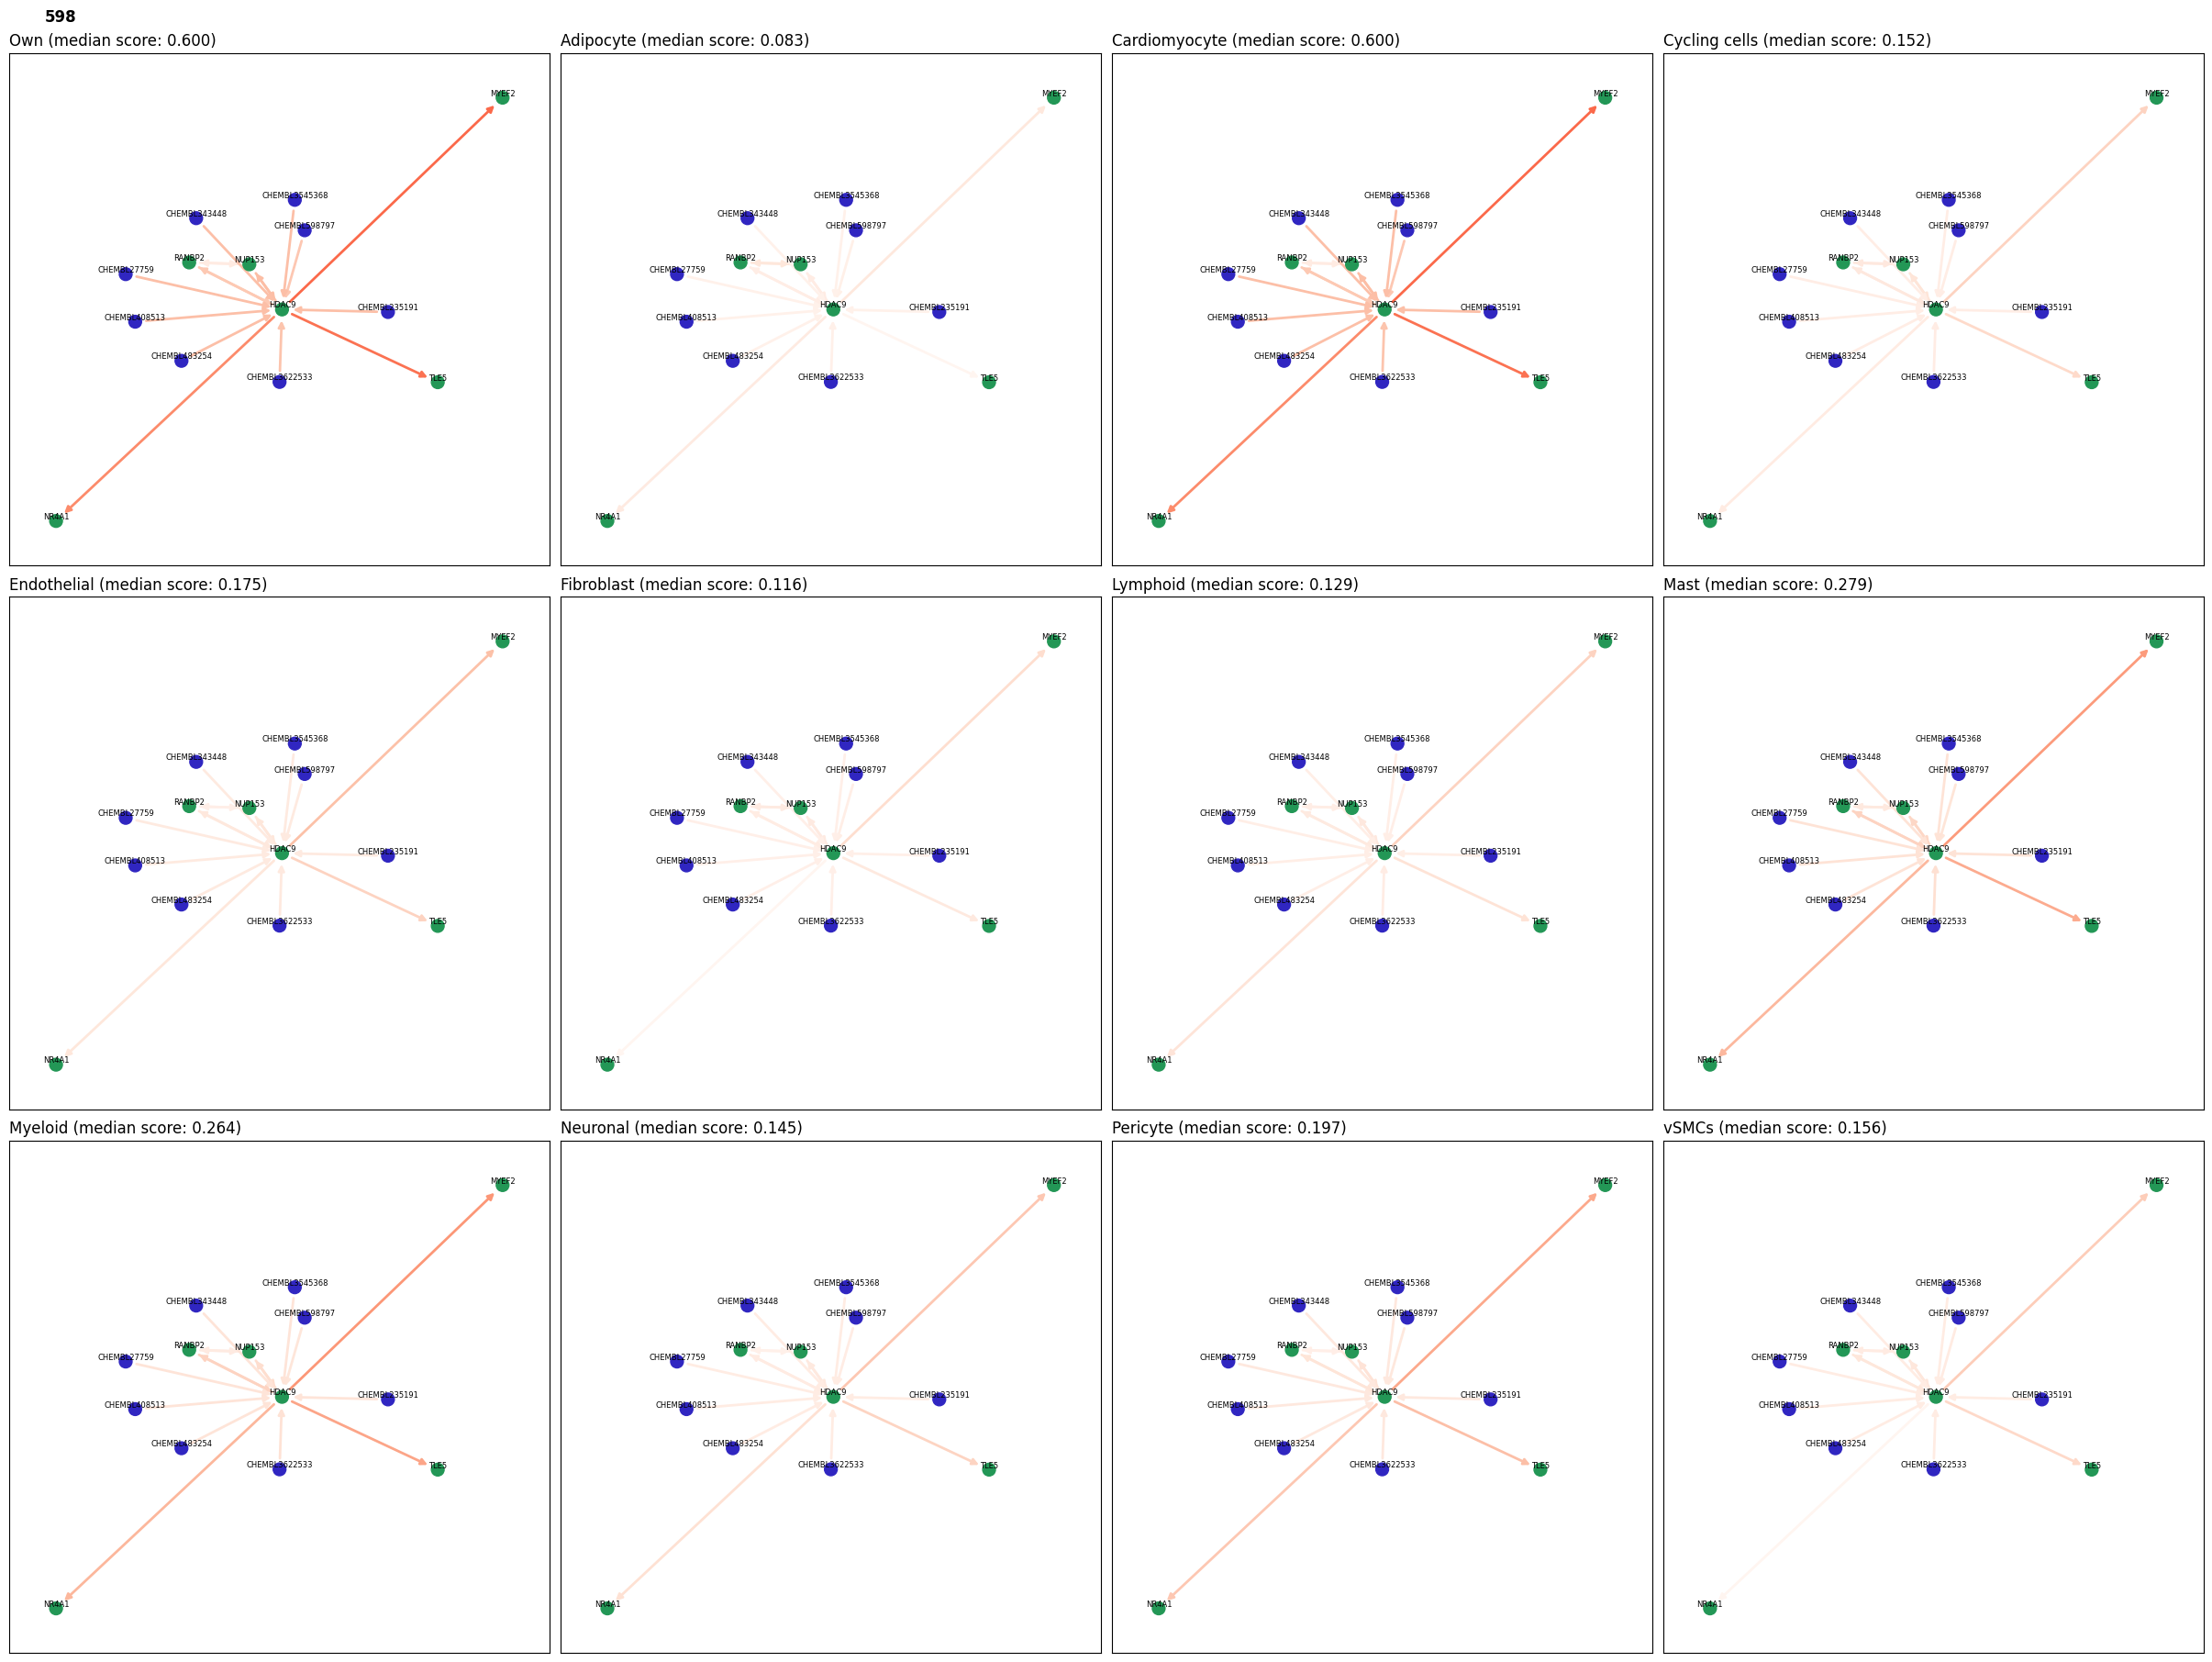

In [12]:
matplotlib.rcParams['figure.figsize'] = [6, 6]


for ci, comm in enumerate(sigcomm):
    
    if 5 < len(comms[comm]) < 70:
        
        print(comm)
        kg.plot_communities(exprKGs, [comms[comm]], font_size=6, titles=[comm])
        
    if ci > 10:
        break